In [107]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.shutterstock.com/image-photo/promotional-banner-rome-five-pictures-260nw-1405593323.jpg")

# Airbnb Rome 2022

#### Website: [Inside Airbnb](http://insideairbnb.com/)
#### Data source: http://insideairbnb.com/get-the-data/
#### Credits to: Inside Airbnb Team and it collaborators - http://insideairbnb.com/about/

_________________________________________________________________________________________________________________________________________________________

### Description:

#### Rome the capital of Italy is also known for being one most visited city worldwide, is consider the heart for food and tourism industry. In 2019 Rome welcomed 10.32 million tourists ranking Rome in the 17th place as the most visited. [Link](https://www.dreambigtravelfarblog.com/blog/rome-travel-tourism-statistics)

#### There are many Airbnb listings in Rome to meet the high demand for temporary lodging for anywhere between a few nights or for many months. In this project, I’m going to take a look at the Rome Airbnb market for the year 2022 by merging multiple tables from "Inside Airbnb Website"


_________________________________________________________________________________________________________________________________________________________

### Commons Attribution 4.0

I’m free or authorized to:

- Share copy and redistribute the material in any medium or format for any purpose, even commercially.
- Adapt, remix, transform, and build upon the material for any purpose, even commercially.
- [link](https://creativecommons.org/licenses/by/4.0/)

_________________________________________________________________________________________________________________________________________________________

### Key Questions:

- What is the average price per night, of an Airbnb listed in Rome?
- How does the average price of an Airbnb listing per month compared to the private rental market?
- How many Airbnb’s were listed in the year 2022?
- How many Airbnb private rooms were listed?
- How do Airbnb listing prices compare across the different neighbourhoods in Rome?
- Extract the key topics from the many comments or reviews posted in the comment column from the dataset and make a Word Cloud visualization to better understand what are the most prevalent topics for the listed Airbnb Listings in Rome.
- Construct visualizations such as plots, word clouds, bar graphs to comply with the principles of data visualization or storytelling in order to better understand the Data.

In [71]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
import datetime as dt
pd.options.mode.chained_assignment = None

In [2]:
# Importing Data

filepath1="listings.csv.gz"
df_listings_gz=pd.read_csv(filepath1,delimiter=",",compression="gzip")


In [3]:
filepath2="calendar.csv.gz"
df_calendar=pd.read_csv(filepath2,delimiter=",",compression="gzip")

In [4]:
filepath3="reviews.csv.gz"
df_reviews_gz=pd.read_csv(filepath3,delimiter=",",compression="gzip")

### 1. Exploring Data

In [5]:
df_listings_gz.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2737,https://www.airbnb.com/rooms/2737,20230907142203,2023-09-08,city scrape,Place to stay in Rome · ★4.80 · 1 bedroom · 1 ...,10 min by bus you can get to Piazza Venezia or...,It used to be an industrial area until late 80...,https://a0.muscache.com/pictures/41225252/e955...,3047,...,5.00,4.40,4.40,NaN,f,6,0,6,0,0.07
1,3079,https://www.airbnb.com/rooms/3079,20230907142203,2023-09-08,city scrape,Rental unit in Rome · ★4.53 · 1 bedroom · 1 be...,With the view of the Colisseum from the front ...,Monti neighborhood is one of the best areas in...,https://a0.muscache.com/pictures/e85b119c-3667...,3504,...,4.86,4.81,4.43,NaN,f,6,6,0,0,0.14
2,103245,https://www.airbnb.com/rooms/103245,20230907142203,2023-09-08,city scrape,Rental unit in Rome · ★4.87 · 2 bedrooms · 4 b...,"In the center of Rome, in the Trastevere distr...",Trastevere is a characteristic and original ne...,https://a0.muscache.com/pictures/805971/9aa629...,538724,...,4.92,4.92,4.82,NaN,t,1,1,0,0,2.60


In [6]:
df_listings_gz.shape
f"{df_listings_gz.shape[0]} Rows by {df_listings_gz.shape[1]} Columns"

'28014 Rows by 75 Columns'

In [7]:
df_reviews_gz.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2737,24343517,2014-12-26,24333039,Raphaell,"This spot was in a great and nice area,walking..."
1,2737,24966779,2015-01-04,10493776,Ia,"Elif was really very helpful, while arranging ..."
2,2737,29770086,2015-04-12,29630601,Julia,"Elif's flat is spacious, clean, and had everyt..."


In [8]:
df_reviews_gz.shape
f"{df_reviews_gz.shape[0]} Rows by {df_reviews_gz.shape[1]} Columns"

'1529499 Rows by 6 Columns'

In [9]:
df_calendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,103245,2023-09-08,f,$110.00,$110.00,2.0,1125.0
1,103245,2023-09-09,f,$110.00,$110.00,2.0,1125.0
2,103245,2023-09-10,f,$110.00,$110.00,2.0,1125.0


In [10]:
df_calendar.shape
f"{df_calendar.shape[0]} Rows by {df_calendar.shape[1]} Columns"

'10225107 Rows by 7 Columns'

### 2. Cleaning up the Data!

#### 2.1 Cleaning df_listings_gz table

In [10]:
df_listings_gz.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2737,https://www.airbnb.com/rooms/2737,20230907142203,2023-09-08,city scrape,Place to stay in Rome · ★4.80 · 1 bedroom · 1 ...,10 min by bus you can get to Piazza Venezia or...,It used to be an industrial area until late 80...,https://a0.muscache.com/pictures/41225252/e955...,3047,...,5.00,4.40,4.40,NaN,f,6,0,6,0,0.07
1,3079,https://www.airbnb.com/rooms/3079,20230907142203,2023-09-08,city scrape,Rental unit in Rome · ★4.53 · 1 bedroom · 1 be...,With the view of the Colisseum from the front ...,Monti neighborhood is one of the best areas in...,https://a0.muscache.com/pictures/e85b119c-3667...,3504,...,4.86,4.81,4.43,NaN,f,6,6,0,0,0.14
2,103245,https://www.airbnb.com/rooms/103245,20230907142203,2023-09-08,city scrape,Rental unit in Rome · ★4.87 · 2 bedrooms · 4 b...,"In the center of Rome, in the Trastevere distr...",Trastevere is a characteristic and original ne...,https://a0.muscache.com/pictures/805971/9aa629...,538724,...,4.92,4.92,4.82,NaN,t,1,1,0,0,2.60
3,11834,https://www.airbnb.com/rooms/11834,20230907142203,2023-09-08,city scrape,Rental unit in Rome · ★4.81 · 1 bedroom · 1 be...,The apartment is located on the ground floor o...,"""Monti"" with its narrow cobblestone alleys, cr...",https://a0.muscache.com/pictures/miso/Hosting-...,44552,...,4.94,4.99,4.76,NaN,f,1,1,0,0,1.35
4,103870,https://www.airbnb.com/rooms/103870,20230907142203,2023-09-08,city scrape,Rental unit in Rome · ★4.18 · 1 bedroom · 2 be...,<b>The space</b><br />The cosy and central Apa...,NaN,https://a0.muscache.com/pictures/2848355/49282...,535822,...,4.59,4.47,4.22,NaN,t,1,1,0,0,1.94


In [11]:
df_listings_gz.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [12]:
# Selecting the relevant columns(df_listings_gz)

filtercolumns=['id','last_scraped','host_id','host_name',"neighbourhood_cleansed",'room_type','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 
'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value',"number_of_reviews"]
df_listings_gz=df_listings_gz.loc[:,filtercolumns]
df_listings_gz

,id,last_scraped,host_id,host_name,neighbourhood_cleansed,room_type,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
0,2737,2023-09-08,3047,Elif,VIII Appia Antica,Private room,4.80,4.60,4.60,4.80,5.00,4.40,4.40,7
1,3079,2023-09-08,3504,Laura,I Centro Storico,Entire home/apt,4.53,4.38,4.62,4.71,4.86,4.81,4.43,21
2,103245,2023-09-08,538724,Carla,I Centro Storico,Entire home/apt,4.87,4.91,4.90,4.92,4.92,4.92,4.82,389
3,11834,2023-09-08,44552,Serena,I Centro Storico,Entire home/apt,4.81,4.82,4.91,4.98,4.94,4.99,4.76,203
4,103870,2023-09-08,535822,Fabrizio,I Centro Storico,Entire home/apt,4.18,4.42,4.28,4.72,4.59,4.47,4.22,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28009,973114587147200878,2023-09-07,501339995,Luciana,X Ostia/Acilia,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
28010,973116672976730965,2023-09-08,440289155,Andrea,I Centro Storico,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
28011,973122317695245605,2023-09-08,535455516,Ernesto,XIII Aurelia,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
28012,973124076276156534,2023-09-07,320656503,Simone,II Parioli/Nomentano,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [13]:
df_listings_gz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28014 entries, 0 to 28013
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           28014 non-null  int64  
 1   last_scraped                 28014 non-null  object 
 2   host_id                      28014 non-null  int64  
 3   host_name                    28014 non-null  object 
 4   neighbourhood_cleansed       28014 non-null  object 
 5   room_type                    28014 non-null  object 
 6   review_scores_rating         24105 non-null  float64
 7   review_scores_accuracy       24019 non-null  float64
 8   review_scores_cleanliness    24018 non-null  float64
 9   review_scores_checkin        24019 non-null  float64
 10  review_scores_communication  24020 non-null  float64
 11  review_scores_location       24016 non-null  float64
 12  review_scores_value          24017 non-null  float64
 13  number_of_review

In [14]:
# Casting last_scraped column to date format

df_listings_gz["last_scraped"]=pd.to_datetime(df_listings_gz["last_scraped"])
df_listings_gz.head(5)

,id,last_scraped,host_id,host_name,neighbourhood_cleansed,room_type,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
0,2737,2023-09-08,3047,Elif,VIII Appia Antica,Private room,4.80,4.60,4.60,4.80,5.00,4.40,4.40,7
1,3079,2023-09-08,3504,Laura,I Centro Storico,Entire home/apt,4.53,4.38,4.62,4.71,4.86,4.81,4.43,21
2,103245,2023-09-08,538724,Carla,I Centro Storico,Entire home/apt,4.87,4.91,4.90,4.92,4.92,4.92,4.82,389
3,11834,2023-09-08,44552,Serena,I Centro Storico,Entire home/apt,4.81,4.82,4.91,4.98,4.94,4.99,4.76,203
4,103870,2023-09-08,535822,Fabrizio,I Centro Storico,Entire home/apt,4.18,4.42,4.28,4.72,4.59,4.47,4.22,289


There are several scores for each category such as:

- Score Rating
- Accuracy
- Cleanliness
- Checkin
- Communication
- Location
- Scores Value

I will calculate a global score qualification calculating the average for all of those

In [15]:
df_listings_gz.columns

Index(['id', 'last_scraped', 'host_id', 'host_name', 'neighbourhood_cleansed',
       'room_type', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'number_of_reviews'],
      dtype='object')

In [16]:
df_listings_gz=df_listings_gz.assign(global_score=lambda x:(x["review_scores_rating"]
+x["review_scores_accuracy"]+x["review_scores_cleanliness"]+x["review_scores_checkin"]+x["review_scores_communication"]
+x["review_scores_location"]+x["review_scores_value"])/7).round(2)
df_listings_gz

,id,last_scraped,host_id,host_name,neighbourhood_cleansed,room_type,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews,global_score
0,2737,2023-09-08,3047,Elif,VIII Appia Antica,Private room,4.80,4.60,4.60,4.80,5.00,4.40,4.40,7,4.66
1,3079,2023-09-08,3504,Laura,I Centro Storico,Entire home/apt,4.53,4.38,4.62,4.71,4.86,4.81,4.43,21,4.62
2,103245,2023-09-08,538724,Carla,I Centro Storico,Entire home/apt,4.87,4.91,4.90,4.92,4.92,4.92,4.82,389,4.89
3,11834,2023-09-08,44552,Serena,I Centro Storico,Entire home/apt,4.81,4.82,4.91,4.98,4.94,4.99,4.76,203,4.89
4,103870,2023-09-08,535822,Fabrizio,I Centro Storico,Entire home/apt,4.18,4.42,4.28,4.72,4.59,4.47,4.22,289,4.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28009,973114587147200878,2023-09-07,501339995,Luciana,X Ostia/Acilia,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
28010,973116672976730965,2023-09-08,440289155,Andrea,I Centro Storico,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
28011,973122317695245605,2023-09-08,535455516,Ernesto,XIII Aurelia,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
28012,973124076276156534,2023-09-07,320656503,Simone,II Parioli/Nomentano,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [17]:
# Filtering Columns to use

filtercolumns=["id","host_name","room_type","neighbourhood_cleansed","global_score","number_of_reviews"]
df_listings_gz=df_listings_gz.loc[:,filtercolumns]
df_listings_gz

,id,host_name,room_type,neighbourhood_cleansed,global_score,number_of_reviews
0,2737,Elif,Private room,VIII Appia Antica,4.66,7
1,3079,Laura,Entire home/apt,I Centro Storico,4.62,21
2,103245,Carla,Entire home/apt,I Centro Storico,4.89,389
3,11834,Serena,Entire home/apt,I Centro Storico,4.89,203
4,103870,Fabrizio,Entire home/apt,I Centro Storico,4.41,289
...,...,...,...,...,...,...
28009,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,NaN,0
28010,973116672976730965,Andrea,Entire home/apt,I Centro Storico,NaN,0
28011,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,NaN,0
28012,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,NaN,0


In [18]:
# Checking for Nulls in the global_score column

df_listings_gz.isnull().sum()

id                           0
host_name                    0
room_type                    0
neighbourhood_cleansed       0
global_score              4000
number_of_reviews            0
dtype: int64

There are 4000 accommodations without a global review, that happened because they are not yet reviewed or simply because travellers did not provide a review score

So I'll have to replace those for Zero

In [19]:
# Filling the Nan values with zero for better data manipulation

df_listings_gz["global_score"]=df_listings_gz.global_score.fillna(0)
df_listings_gz.sample(3)

,id,host_name,room_type,neighbourhood_cleansed,global_score,number_of_reviews
4331,10030641,Giuseppe E Alessandra,Entire home/apt,VI Roma delle Torri,4.55,6
26545,932386969728201785,Attilio,Entire home/apt,II Parioli/Nomentano,0.00,0
13941,42038382,Giorgia,Entire home/apt,I Centro Storico,4.63,5


In [20]:
df_listings_gz.isnull().sum()

id                        0
host_name                 0
room_type                 0
neighbourhood_cleansed    0
global_score              0
number_of_reviews         0
dtype: int64

In [21]:
# Renaiming columns

df_listings_gz.rename(columns=({"id":"listing_id","global_score":"score","neighbourhood_cleansed":"neighbourhood"}),inplace=True)
df_listings_gz

,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews
0,2737,Elif,Private room,VIII Appia Antica,4.66,7
1,3079,Laura,Entire home/apt,I Centro Storico,4.62,21
2,103245,Carla,Entire home/apt,I Centro Storico,4.89,389
3,11834,Serena,Entire home/apt,I Centro Storico,4.89,203
4,103870,Fabrizio,Entire home/apt,I Centro Storico,4.41,289
...,...,...,...,...,...,...
28009,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,0.00,0
28010,973116672976730965,Andrea,Entire home/apt,I Centro Storico,0.00,0
28011,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,0.00,0
28012,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,0.00,0


#### 2.2 Cleaning df_calendar Table

In [22]:
df_calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,103245,2023-09-08,f,$110.00,$110.00,2.0,1125.0
1,103245,2023-09-09,f,$110.00,$110.00,2.0,1125.0
2,103245,2023-09-10,f,$110.00,$110.00,2.0,1125.0
3,103245,2023-09-11,f,$110.00,$110.00,2.0,1125.0
4,103245,2023-09-12,t,$110.00,$110.00,2.0,1125.0
...,...,...,...,...,...,...,...
10225102,970368661508986205,2024-09-02,f,$70.00,$70.00,1.0,20.0
10225103,970368661508986205,2024-09-03,f,$70.00,$70.00,1.0,20.0
10225104,970368661508986205,2024-09-04,f,$70.00,$70.00,1.0,20.0
10225105,970368661508986205,2024-09-05,f,$70.00,$70.00,1.0,20.0


In [23]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10225107 entries, 0 to 10225106
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 546.1+ MB


In [24]:
# Casting date column to datetime

df_calendar["date"]=pd.to_datetime(df_calendar["date"])
df_calendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,103245,2023-09-08,f,$110.00,$110.00,2.0,1125.0
1,103245,2023-09-09,f,$110.00,$110.00,2.0,1125.0
2,103245,2023-09-10,f,$110.00,$110.00,2.0,1125.0


In [25]:
# Checking for NaN

df_calendar.isnull().sum()

listing_id          0
date                0
available           0
price             189
adjusted_price    189
minimum_nights      4
maximum_nights      4
dtype: int64

In [26]:
# Dropping NaN Values on the price column

filter=df_calendar.price.notnull()
df_calendar=df_calendar.loc[filter]
df_calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,103245,2023-09-08,f,$110.00,$110.00,2.0,1125.0
1,103245,2023-09-09,f,$110.00,$110.00,2.0,1125.0
2,103245,2023-09-10,f,$110.00,$110.00,2.0,1125.0
3,103245,2023-09-11,f,$110.00,$110.00,2.0,1125.0
4,103245,2023-09-12,t,$110.00,$110.00,2.0,1125.0
...,...,...,...,...,...,...,...
10225102,970368661508986205,2024-09-02,f,$70.00,$70.00,1.0,20.0
10225103,970368661508986205,2024-09-03,f,$70.00,$70.00,1.0,20.0
10225104,970368661508986205,2024-09-04,f,$70.00,$70.00,1.0,20.0
10225105,970368661508986205,2024-09-05,f,$70.00,$70.00,1.0,20.0


In [27]:
# Removing "$" from price column

df_calendar["price"]=df_calendar.price.str.replace("$","")
df_calendar.sample(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
5808125,49644738,2024-08-26,t,853.00,$853.00,3.0,1125.0
580083,2672762,2023-09-08,f,110.00,$110.00,2.0,30.0
2707685,19666944,2024-06-24,f,240.00,$240.00,1.0,999.0


In [28]:
# There are some rows with commas(,) in the price column, so I proceed to remove it

def get_price(price):
    return price.split(".")[0]

df_calendar["total_price"]=df_calendar["price"].apply(lambda x:get_price(x))
df_calendar["total_price"]=df_calendar.total_price.str.replace(",","")
df_calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,total_price
0,103245,2023-09-08,f,110.00,$110.00,2.0,1125.0,110
1,103245,2023-09-09,f,110.00,$110.00,2.0,1125.0,110
2,103245,2023-09-10,f,110.00,$110.00,2.0,1125.0,110
3,103245,2023-09-11,f,110.00,$110.00,2.0,1125.0,110
4,103245,2023-09-12,t,110.00,$110.00,2.0,1125.0,110
...,...,...,...,...,...,...,...,...
10225102,970368661508986205,2024-09-02,f,70.00,$70.00,1.0,20.0,70
10225103,970368661508986205,2024-09-03,f,70.00,$70.00,1.0,20.0,70
10225104,970368661508986205,2024-09-04,f,70.00,$70.00,1.0,20.0,70
10225105,970368661508986205,2024-09-05,f,70.00,$70.00,1.0,20.0,70


In [29]:
# Casting total_price column to float number

df_calendar["total_price"]=pd.to_numeric(df_calendar["total_price"]).astype(float)

In [30]:
# Filtering until november 2023 to extract the most updated prices

filter=df_calendar["date"].dt.month==11
df_calendar=df_calendar.loc[filter]
df_calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,total_price
54,103245,2023-11-01,f,90.00,$90.00,2.0,1125.0,90.0
55,103245,2023-11-02,f,90.00,$90.00,2.0,1125.0,90.0
56,103245,2023-11-03,f,90.00,$90.00,2.0,1125.0,90.0
57,103245,2023-11-04,f,90.00,$90.00,2.0,1125.0,90.0
58,103245,2023-11-05,f,90.00,$90.00,2.0,1125.0,90.0
...,...,...,...,...,...,...,...,...
10224821,970368661508986205,2023-11-26,t,70.00,$70.00,1.0,20.0,70.0
10224822,970368661508986205,2023-11-27,t,70.00,$70.00,1.0,20.0,70.0
10224823,970368661508986205,2023-11-28,t,70.00,$70.00,1.0,20.0,70.0
10224824,970368661508986205,2023-11-29,t,70.00,$70.00,1.0,20.0,70.0


In [31]:
# Filtering Columns

filtercolumns=["listing_id","minimum_nights","total_price"]
df_calendar=df_calendar.loc[:,filtercolumns]
df_calendar

,listing_id,minimum_nights,total_price
54,103245,2.0,90.0
55,103245,2.0,90.0
56,103245,2.0,90.0
57,103245,2.0,90.0
58,103245,2.0,90.0
...,...,...,...
10224821,970368661508986205,1.0,70.0
10224822,970368661508986205,1.0,70.0
10224823,970368661508986205,1.0,70.0
10224824,970368661508986205,1.0,70.0


In [32]:
df_calendar.rename(columns=({"total_price":"price"}),inplace=True)
df_calendar

,listing_id,minimum_nights,price
54,103245,2.0,90.0
55,103245,2.0,90.0
56,103245,2.0,90.0
57,103245,2.0,90.0
58,103245,2.0,90.0
...,...,...,...
10224821,970368661508986205,1.0,70.0
10224822,970368661508986205,1.0,70.0
10224823,970368661508986205,1.0,70.0
10224824,970368661508986205,1.0,70.0


#### 2.3 Cleaning df_reviews Table

In [33]:
df_reviews_gz

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2737,24343517,2014-12-26,24333039,Raphaell,"This spot was in a great and nice area,walking..."
1,2737,24966779,2015-01-04,10493776,Ia,"Elif was really very helpful, while arranging ..."
2,2737,29770086,2015-04-12,29630601,Julia,"Elif's flat is spacious, clean, and had everyt..."
3,2737,30477570,2015-04-22,31215535,Sevil,I had a wonderful time staying with Elif and h...
4,2737,31659336,2015-05-08,1959813,Suzy,"Elif was a brilliant host, with an exceptional..."
...,...,...,...,...,...,...
1529494,968549357691982064,972337732617510393,2023-09-03,72271090,Silvia,"Alloggio ben arredato, molto pulito, ordinato,..."
1529495,968549357691982064,974489388812740907,2023-09-06,40689877,Antonio,"Il 6 settembre 2023, ho soggiornato in questa ..."
1529496,968676260217798067,975178507565796158,2023-09-07,150289837,John,"El lugar está muy bien ubicado, muy fácil de l..."
1529497,965099686279050495,972280823192353091,2023-09-03,161119948,Brieuc,Grazie mille ! il mio ospite è stato molto acc...


In [34]:
df_reviews_gz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529499 entries, 0 to 1529498
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1529499 non-null  int64 
 1   id             1529499 non-null  int64 
 2   date           1529499 non-null  object
 3   reviewer_id    1529499 non-null  int64 
 4   reviewer_name  1529498 non-null  object
 5   comments       1529408 non-null  object
dtypes: int64(3), object(3)
memory usage: 70.0+ MB


In [35]:
# Casting Date column

df_reviews_gz["date"]=pd.to_datetime(df_reviews_gz["date"])
df_reviews_gz.sample(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
718876,15529126,257240179,2018-04-25,19285706,Michael,Wow. What a fantastic place! My family and I e...
303099,4356619,132471266,2017-02-18,114038012,Natalie,Fantastic family friendly apartment. Very clea...
566809,10802987,99729375,2016-09-05,22992319,Fanny,Het waren onvergetelijke dagen in prachtig Rom...


In [37]:
df_reviews_gz.date.min()

Timestamp('2010-05-14 00:00:00')

In [38]:
df_reviews_gz.date.max()

Timestamp('2023-09-08 00:00:00')

In [39]:
df_reviews_gz.shape

(1529499, 6)

In [40]:
f"There are {df_reviews_gz.shape[0]} comments dating from the year {df_reviews_gz.date.dt.year.min()} to the year {df_reviews_gz.date.dt.year.max()}. So considering the large amount of reviews im going to filter those for the year 2022"

'There are 1529499 comments dating from the year 2010 to the year 2023. So considering the large amount of reviews im going to filter those for the year 2022'

In [36]:
# Filtering reviews by 2022 year

filter=df_reviews_gz["date"].dt.year==2022
df_reviews_gz=df_reviews_gz.loc[filter]
df_reviews_gz

,listing_id,id,date,reviewer_id,reviewer_name,comments
26,3079,531635607355451020,2022-01-03,157127667,Cristina,La signora Laura è stata molto cordiale e disp...
27,3079,616435416997069059,2022-04-30,17244368,Rachid,Laura a été une excellente hôtesse. Je l'en re...
169,11834,626545202624846537,2022-05-14,386062739,Joe,Great location. Everything whiting walking di...
170,11834,629521933486037303,2022-05-18,214546046,Saholinavalona Princia,The location was perfect for us and the studio...
171,11834,630951688965885162,2022-05-20,65275159,Kimberly,Amazing location and very adorable flat. Will ...
...,...,...,...,...,...,...
1518978,882472394957431598,777327989235415294,2022-12-08,164470525,Elcio,Apartamento excelente!! Recepção muito boa e l...
1518979,882472394957431598,781035446422537184,2022-12-13,218698129,Ginix,NaN
1518980,882472394957431598,785300313373639964,2022-12-19,231470725,Cláudia,Excelente localização! Apartamento bem complet...
1518981,882472394957431598,789031027680992959,2022-12-24,50232500,Mailen,Departamento muy lindo y muy bien ubicado dond...


In [37]:
# Dropping NaN

filter=df_reviews_gz.comments.notnull()
df_reviews_gz=df_reviews_gz.loc[filter]
df_reviews_gz

,listing_id,id,date,reviewer_id,reviewer_name,comments
26,3079,531635607355451020,2022-01-03,157127667,Cristina,La signora Laura è stata molto cordiale e disp...
27,3079,616435416997069059,2022-04-30,17244368,Rachid,Laura a été une excellente hôtesse. Je l'en re...
169,11834,626545202624846537,2022-05-14,386062739,Joe,Great location. Everything whiting walking di...
170,11834,629521933486037303,2022-05-18,214546046,Saholinavalona Princia,The location was perfect for us and the studio...
171,11834,630951688965885162,2022-05-20,65275159,Kimberly,Amazing location and very adorable flat. Will ...
...,...,...,...,...,...,...
1518977,882472394957431598,772265721111843142,2022-12-01,83966904,Marian,We very much enjoyed staying at this apartment...
1518978,882472394957431598,777327989235415294,2022-12-08,164470525,Elcio,Apartamento excelente!! Recepção muito boa e l...
1518980,882472394957431598,785300313373639964,2022-12-19,231470725,Cláudia,Excelente localização! Apartamento bem complet...
1518981,882472394957431598,789031027680992959,2022-12-24,50232500,Mailen,Departamento muy lindo y muy bien ubicado dond...


In [38]:
# Filtering Columns

filtercolumns=["listing_id","comments"]
df_reviews_gz=df_reviews_gz.loc[:,filtercolumns]
df_reviews_gz

,listing_id,comments
26,3079,La signora Laura è stata molto cordiale e disp...
27,3079,Laura a été une excellente hôtesse. Je l'en re...
169,11834,Great location. Everything whiting walking di...
170,11834,The location was perfect for us and the studio...
171,11834,Amazing location and very adorable flat. Will ...
...,...,...
1518977,882472394957431598,We very much enjoyed staying at this apartment...
1518978,882472394957431598,Apartamento excelente!! Recepção muito boa e l...
1518980,882472394957431598,Excelente localização! Apartamento bem complet...
1518981,882472394957431598,Departamento muy lindo y muy bien ubicado dond...


### 3. Analyse Data

In [39]:
# Making copies

listings=df_listings_gz.copy()

In [40]:
reviews=df_reviews_gz.copy()

In [41]:
calendar=df_calendar.copy()

#### Key Questions:

1. What is the average price per night, of an Airbnb listed in Rome?.
2. How does the average price of an Airbnb listed in Rome per month compared to the private rental market?.
3. How many Airbnb room types are listed?.
4. How do Airbnb listing prices compare across the different neighbourhoods in Rome?.
5. List the top Hosts in Rome city based on Score.
6. Extract the key topics from the reviews posted by travelers.
7. Extract the key topics from low scores reviews posted by travelers.
8. What is the minimum nights policy required for travelers to stay?

In [42]:
listings

,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews
0,2737,Elif,Private room,VIII Appia Antica,4.66,7
1,3079,Laura,Entire home/apt,I Centro Storico,4.62,21
2,103245,Carla,Entire home/apt,I Centro Storico,4.89,389
3,11834,Serena,Entire home/apt,I Centro Storico,4.89,203
4,103870,Fabrizio,Entire home/apt,I Centro Storico,4.41,289
...,...,...,...,...,...,...
28009,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,0.00,0
28010,973116672976730965,Andrea,Entire home/apt,I Centro Storico,0.00,0
28011,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,0.00,0
28012,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,0.00,0


In [43]:
calendar

,listing_id,minimum_nights,price
54,103245,2.0,90.0
55,103245,2.0,90.0
56,103245,2.0,90.0
57,103245,2.0,90.0
58,103245,2.0,90.0
...,...,...,...
10224821,970368661508986205,1.0,70.0
10224822,970368661508986205,1.0,70.0
10224823,970368661508986205,1.0,70.0
10224824,970368661508986205,1.0,70.0


The pricing of Airbnb accommodations exhibits a notable sensitivity to various factors, including:

- Fluctuations in supply and demand.
- Seasonal variations in demand.
- Peak travel periods, such as school holidays, extended weekends, and favorable weather conditions.
- Off-peak travel times, marked by adverse weather conditions and surges in air ticket prices.

Given the aforementioned sensitivities, in order to obtain a more accurate estimate for each accommodation's price, I will calculate the average price for each Airbnb listing.

In [44]:
calendar=calendar.groupby(["listing_id"],as_index=False).price.mean().round()
calendar

,listing_id,price
0,2737,60.0
1,3079,90.0
2,11834,107.0
3,12398,95.0
4,19965,169.0
...,...,...
28008,974444069985636620,64.0
28009,974518488270766355,100.0
28010,974522462685404156,99.0
28011,975043653007402983,170.0


In [45]:
# Merging Tables

airbnb=pd.merge(left=listings,right=calendar,on="listing_id",how="left")
airbnb

,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews,price
0,2737,Elif,Private room,VIII Appia Antica,4.66,7,60.0
1,3079,Laura,Entire home/apt,I Centro Storico,4.62,21,90.0
2,103245,Carla,Entire home/apt,I Centro Storico,4.89,389,98.0
3,11834,Serena,Entire home/apt,I Centro Storico,4.89,203,107.0
4,103870,Fabrizio,Entire home/apt,I Centro Storico,4.41,289,81.0
...,...,...,...,...,...,...,...
28009,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,0.00,0,200.0
28010,973116672976730965,Andrea,Entire home/apt,I Centro Storico,0.00,0,400.0
28011,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,0.00,0,155.0
28012,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,0.00,0,80.0


In [46]:
airbnb.describe()

,listing_id,score,number_of_reviews,price
count,2.801400e+04,28014.000000,28014.000000,28013.000000
mean,2.832589e+17,4.067353,54.597665,196.756899
std,3.881674e+17,1.683839,87.696939,818.006685
min,2.737000e+03,0.000000,0.000000,9.000000
25%,1.825100e+07,4.540000,3.000000,83.000000
50%,4.196794e+07,4.780000,18.000000,123.000000
75%,7.194242e+17,4.890000,67.000000,190.000000
max,9.751335e+17,5.000000,1731.000000,90963.000000


The above output describes the metrics for price ranges in the whole Rome area

Im going to categorized the listings based on whether they fall into specific price ranges.

- Budget
- Average
- Expensive
- Extravagant

In [47]:
label_names=["Low","Average","Expensive","Extravagant"]
price_ranges=[9,83,196,1000,np.inf]

airbnb["price_category"]=pd.cut(airbnb["price"],bins=price_ranges,labels=label_names)
airbnb

,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews,price,price_category
0,2737,Elif,Private room,VIII Appia Antica,4.66,7,60.0,Low
1,3079,Laura,Entire home/apt,I Centro Storico,4.62,21,90.0,Average
2,103245,Carla,Entire home/apt,I Centro Storico,4.89,389,98.0,Average
3,11834,Serena,Entire home/apt,I Centro Storico,4.89,203,107.0,Average
4,103870,Fabrizio,Entire home/apt,I Centro Storico,4.41,289,81.0,Low
...,...,...,...,...,...,...,...,...
28009,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,0.00,0,200.0,Expensive
28010,973116672976730965,Andrea,Entire home/apt,I Centro Storico,0.00,0,400.0,Expensive
28011,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,0.00,0,155.0,Average
28012,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,0.00,0,80.0,Low


In [48]:
total_listings=airbnb.listing_id.count()
f"there are {total_listings} listed Airbnb accommodations in Rome"

'there are 28014 listed Airbnb accommodations in Rome'

In [49]:
filter=airbnb.price_category=="Extravagant"
airbnb.loc[filter].sort_values("price",ascending=False).head(20).sample(frac=0.5)

,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews,price,price_category
4460,10217464,Grace,Entire home/apt,VII San Giovanni/Cinecittà,4.72,30,50000.0,Extravagant
20532,684109357882102152,Jerome,Entire home/apt,I Centro Storico,0.00,0,11500.0,Extravagant
18849,603448009094263244,Fabrizio,Entire home/apt,XII Monte Verde,4.80,5,9999.0,Extravagant
13804,41518836,Marco,Entire home/apt,I Centro Storico,4.31,8,20000.0,Extravagant
16418,50782475,Laur,Entire home/apt,XIV Monte Mario,0.00,0,10000.0,Extravagant
11857,34595621,Silvia,Entire home/apt,VII San Giovanni/Cinecittà,3.71,2,9999.0,Extravagant
16958,52212867,Valerio,Entire home/apt,XI Arvalia/Portuense,3.86,1,90963.0,Extravagant
15285,46209255,Elena,Entire home/apt,VII San Giovanni/Cinecittà,4.29,1,9999.0,Extravagant
16098,50163552,Michele,Entire home/apt,I Centro Storico,4.65,37,9999.0,Extravagant
25102,892174832852476992,Dario,Entire home/apt,I Centro Storico,5.00,4,9999.0,Extravagant


Some prices are extremely high, for example the max price for an accommodation is $90.963,00 per night.

- Listing id: 52212867 [link](https://es.airbnb.com/rooms/52212867?_set_bev_on_new_domain=1681591329_ZTAzYzkyNGJlYWY4&source_impression_id=p3_1701244952_ojc5faqUQ5TalTn7&check_in=2024-01-04&guests=1&adults=1&check_out=2024-01-08)

- Listing id: 47268454 [link](https://es.airbnb.com/rooms/47268454?_set_bev_on_new_domain=1681591329_ZTAzYzkyNGJlYWY4&source_impression_id=p3_1701244952_ojc5faqUQ5TalTn7&check_in=2024-01-04&guests=1&adults=1&check_out=2024-01-08)

- Listing id: 684109357882102152 Reported as an error by Airbnb [link](https://es.airbnb.com/rooms/684109357882102152?_set_bev_on_new_domain=1681591329_ZTAzYzkyNGJlYWY4&source_impression_id=p3_1701244952_ojc5faqUQ5TalTn7&check_in=2024-01-04&guests=1&adults=1&check_out=2024-01-08)

- Listing id: 41518836, Does not exist

- Listing id: 913082159478302458, Does not exist

Considering some prices spikes beyond the average of the entire population data, will be better to consider those as an "Anomaly"

According to [Databand](https://databand.ai/blog/data-anomaly-types-clauses/), data anomaly "also known as an outlier, is an observation or data point that deviates significantly from the norm, making it inconsistent with the rest of the dataset. Data anomalies can be either intentional or unintentional and may result from errors, noise, or merely unique occurrences. These anomalies can significantly impact data analysis, leading to incorrect or misleading insights."

Another definition from [wikipedia](https://en.wikipedia.org/wiki/Anomaly_detection), "In data analysis, anomaly detection (also referred to as outlier detection and sometimes as novelty detection) is generally understood to be the identification of rare items, events or observations which deviate significantly from the majority of the data and do not conform to a well defined notion of normal behaviour."

These anomialies can also be explained as some  kind of malfunctions on Airbnb servers, as being reported by some users on the Airbnb community section: 

- "Prezzi sbagliati"-> [link](https://community.withairbnb.com/t5/Supporto/prezzi-sbagliati/m-p/205966)
- "Listing shows with wrong price"-> [link](https://community.withairbnb.com/t5/Help/LISTING-SHOWS-WITH-WRONG-TOO-HIGH-PRICE/td-p/12131)


In [50]:
airbnb.describe()

,listing_id,score,number_of_reviews,price
count,2.801400e+04,28014.000000,28014.000000,28013.000000
mean,2.832589e+17,4.067353,54.597665,196.756899
std,3.881674e+17,1.683839,87.696939,818.006685
min,2.737000e+03,0.000000,0.000000,9.000000
25%,1.825100e+07,4.540000,3.000000,83.000000
50%,4.196794e+07,4.780000,18.000000,123.000000
75%,7.194242e+17,4.890000,67.000000,190.000000
max,9.751335e+17,5.000000,1731.000000,90963.000000


In [51]:
# Relabiling for those consider as an "Anomaly"

label_names=["Low","Average","Expensive","Extravagant","Anomaly"]
price_ranges=[9,83,197,1000,9000,np.inf]

airbnb["price_category"]=pd.cut(airbnb["price"],bins=price_ranges,labels=label_names)
airbnb

,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews,price,price_category
0,2737,Elif,Private room,VIII Appia Antica,4.66,7,60.0,Low
1,3079,Laura,Entire home/apt,I Centro Storico,4.62,21,90.0,Average
2,103245,Carla,Entire home/apt,I Centro Storico,4.89,389,98.0,Average
3,11834,Serena,Entire home/apt,I Centro Storico,4.89,203,107.0,Average
4,103870,Fabrizio,Entire home/apt,I Centro Storico,4.41,289,81.0,Low
...,...,...,...,...,...,...,...,...
28009,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,0.00,0,200.0,Expensive
28010,973116672976730965,Andrea,Entire home/apt,I Centro Storico,0.00,0,400.0,Expensive
28011,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,0.00,0,155.0,Average
28012,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,0.00,0,80.0,Low


In [52]:
# Ruling out Anomalies

filter=airbnb.price_category!="Anomaly"
airbnb=airbnb.loc[filter]
airbnb

,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews,price,price_category
0,2737,Elif,Private room,VIII Appia Antica,4.66,7,60.0,Low
1,3079,Laura,Entire home/apt,I Centro Storico,4.62,21,90.0,Average
2,103245,Carla,Entire home/apt,I Centro Storico,4.89,389,98.0,Average
3,11834,Serena,Entire home/apt,I Centro Storico,4.89,203,107.0,Average
4,103870,Fabrizio,Entire home/apt,I Centro Storico,4.41,289,81.0,Low
...,...,...,...,...,...,...,...,...
28009,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,0.00,0,200.0,Expensive
28010,973116672976730965,Andrea,Entire home/apt,I Centro Storico,0.00,0,400.0,Expensive
28011,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,0.00,0,155.0,Average
28012,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,0.00,0,80.0,Low


#### 3.1 What is the average price per night, of an Airbnb listed in Rome?

In [53]:
avg_per_night=airbnb.price.mean().round(2)
avg_per_night

181.0

In [54]:
f"For the total of {total_listings} Airbnb acommodations reviewed in Rome,the average price per night is ${avg_per_night}(without anomalities)"

'For the total of 28014 Airbnb acommodations reviewed in Rome,the average price per night is $181.0(without anomalities)'

#### 3.2 How does the average price of an Airbnb listed in Rome per month compared to the private rental market?

knowing how much costs an acommodation per night in Rome, would be useful to have a benchmark for comparison.

According to [housinganywhere](https://housinganywhere.com/Rome--Italy/cost-of-living-rome), a 1 bedroom apartment in Rome City costs, on average, $1.650 per month.

In [55]:
# Im going to add price per month column by converting the per night prices of the listings into monthly costs, so I can compare to the private market.

airbnb

,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews,price,price_category
0,2737,Elif,Private room,VIII Appia Antica,4.66,7,60.0,Low
1,3079,Laura,Entire home/apt,I Centro Storico,4.62,21,90.0,Average
2,103245,Carla,Entire home/apt,I Centro Storico,4.89,389,98.0,Average
3,11834,Serena,Entire home/apt,I Centro Storico,4.89,203,107.0,Average
4,103870,Fabrizio,Entire home/apt,I Centro Storico,4.41,289,81.0,Low
...,...,...,...,...,...,...,...,...
28009,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,0.00,0,200.0,Expensive
28010,973116672976730965,Andrea,Entire home/apt,I Centro Storico,0.00,0,400.0,Expensive
28011,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,0.00,0,155.0,Average
28012,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,0.00,0,80.0,Low


In [56]:
airbnb=airbnb.assign(price_per_month=lambda x:((x["price"]*365)/12).round(2))
airbnb

,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews,price,price_category,price_per_month
0,2737,Elif,Private room,VIII Appia Antica,4.66,7,60.0,Low,1825.00
1,3079,Laura,Entire home/apt,I Centro Storico,4.62,21,90.0,Average,2737.50
2,103245,Carla,Entire home/apt,I Centro Storico,4.89,389,98.0,Average,2980.83
3,11834,Serena,Entire home/apt,I Centro Storico,4.89,203,107.0,Average,3254.58
4,103870,Fabrizio,Entire home/apt,I Centro Storico,4.41,289,81.0,Low,2463.75
...,...,...,...,...,...,...,...,...,...
28009,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,0.00,0,200.0,Expensive,6083.33
28010,973116672976730965,Andrea,Entire home/apt,I Centro Storico,0.00,0,400.0,Expensive,12166.67
28011,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,0.00,0,155.0,Average,4714.58
28012,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,0.00,0,80.0,Low,2433.33


In [57]:
avg_per_month=airbnb.price_per_month.mean().round(2)
avg_per_month

5505.47

In [58]:
f"An Airbnb per month in Rome costs: ${avg_per_month}, while in the private market you would pay $1.650,00"

'An Airbnb per month in Rome costs: $5505.47, while in the private market you would pay $1.650,00'

These prices are just the average rental prices across Rome, depending on the Roman neighborhood.

#### 3.3 How many Airbnb room types are listed?

Unsurprisingly, using Airbnb per month appears to be substantially more expensive than the private rental market. I should consider that these Airbnb listings include single private rooms or even rooms to share, as well as entire homes/apartments.

I will dive deeper into the room_type column to find out the breakdown of listings by type of room.

In [59]:
airbnb

,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews,price,price_category,price_per_month
0,2737,Elif,Private room,VIII Appia Antica,4.66,7,60.0,Low,1825.00
1,3079,Laura,Entire home/apt,I Centro Storico,4.62,21,90.0,Average,2737.50
2,103245,Carla,Entire home/apt,I Centro Storico,4.89,389,98.0,Average,2980.83
3,11834,Serena,Entire home/apt,I Centro Storico,4.89,203,107.0,Average,3254.58
4,103870,Fabrizio,Entire home/apt,I Centro Storico,4.41,289,81.0,Low,2463.75
...,...,...,...,...,...,...,...,...,...
28009,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,0.00,0,200.0,Expensive,6083.33
28010,973116672976730965,Andrea,Entire home/apt,I Centro Storico,0.00,0,400.0,Expensive,12166.67
28011,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,0.00,0,155.0,Average,4714.58
28012,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,0.00,0,80.0,Low,2433.33


In [60]:
room_types=airbnb.groupby(["room_type"],as_index=False).price.count().rename(columns=({"price":"total"}))
room_types.reset_index(drop=True)

,room_type,total
0,Entire home/apt,19594
1,Hotel room,627
2,Private room,7613
3,Shared room,152


In [61]:
room_types=room_types.assign(market_share=lambda x:(x["total"]/total_listings*100)).round(2)
room_types

,room_type,total,market_share
0,Entire home/apt,19594,69.94
1,Hotel room,627,2.24
2,Private room,7613,27.18
3,Shared room,152,0.54


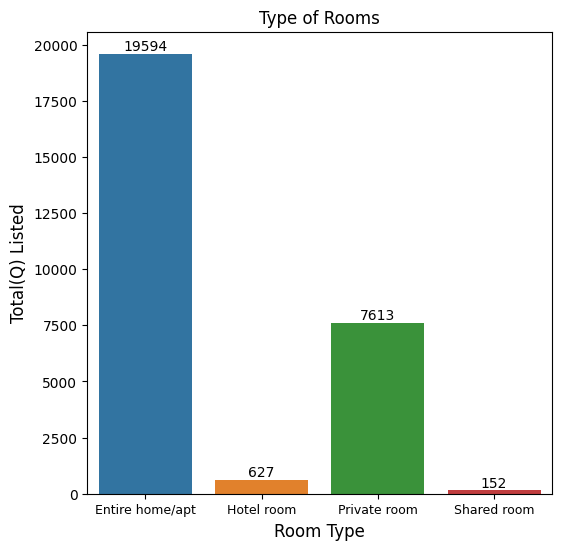

In [185]:
plt.figure(figsize=(6,6))
ax=sns.barplot(x="room_type",y="total",data=room_types,hue="room_type",legend=False)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Type of Rooms")
plt.xlabel("Room Type",fontsize=12)
plt.ylabel("Total(Q) Listed",fontsize=12)
plt.xticks(rotation=0,size=9)
plt.show()

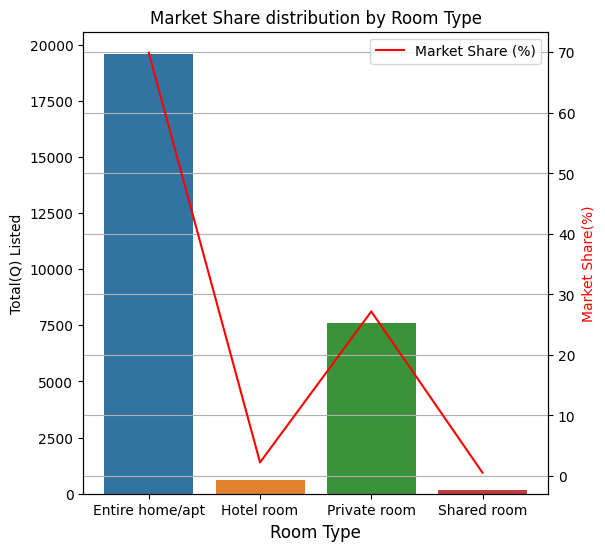

In [186]:
fig=plt.figure(figsize=(6,6))
ax1=sns.barplot(x="room_type",y="total",hue="room_type",palette="tab10",data=room_types)
plt.xticks(rotation=0,size=10)
plt.xlabel("Room Type",fontsize=12)
plt.ylabel("Total(Q) Listed")
ax2=ax1.twinx()
ax2=sns.lineplot(x="room_type",y="market_share",data=room_types,label="Market Share (%)",color="r")
plt.ylabel("Market Share(%)",color="r")
plt.title("Market Share distribution by Room Type")
plt.grid()
plt.show()

In [187]:
f"There are {total_listings} accomodations listed in Rome. The Entire home/apt holds most part of the market share with {round((19617/28014*100),2)}% "

'There are 28014 accomodations listed in Rome. The Entire home/apt holds most part of the market share with 70.03% '

#### 3.4 How do Airbnb listing prices compare across the different neighbourhoods in Rome?

In [62]:
airbnb

,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews,price,price_category,price_per_month
0,2737,Elif,Private room,VIII Appia Antica,4.66,7,60.0,Low,1825.00
1,3079,Laura,Entire home/apt,I Centro Storico,4.62,21,90.0,Average,2737.50
2,103245,Carla,Entire home/apt,I Centro Storico,4.89,389,98.0,Average,2980.83
3,11834,Serena,Entire home/apt,I Centro Storico,4.89,203,107.0,Average,3254.58
4,103870,Fabrizio,Entire home/apt,I Centro Storico,4.41,289,81.0,Low,2463.75
...,...,...,...,...,...,...,...,...,...
28009,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,0.00,0,200.0,Expensive,6083.33
28010,973116672976730965,Andrea,Entire home/apt,I Centro Storico,0.00,0,400.0,Expensive,12166.67
28011,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,0.00,0,155.0,Average,4714.58
28012,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,0.00,0,80.0,Low,2433.33


In [63]:
airbnb.groupby(["neighbourhood"],as_index=False)["price"].agg(["min","max","mean"])

,neighbourhood,min,max,mean
0,I Centro Storico,9.0,9000.0,220.260875
1,II Parioli/Nomentano,9.0,7000.0,171.649159
2,III Monte Sacro,14.0,8500.0,157.061966
3,IV Tiburtina,10.0,5564.0,151.874517
4,IX Eur,17.0,2117.0,172.649025
5,V Prenestino/Centocelle,12.0,5000.0,98.505687
6,VI Roma delle Torri,10.0,1130.0,95.695473
7,VII San Giovanni/Cinecittà,11.0,3317.0,121.901734
8,VIII Appia Antica,15.0,2000.0,123.632242
9,X Ostia/Acilia,18.0,4043.0,109.641698


The above output gives us a summary of prices for listings across the 15 boroughs in Rome

In [64]:
boroughs=airbnb.groupby(["neighbourhood"],as_index=False).price.mean().round().sort_values("price",ascending=False)
boroughs

,neighbourhood,price
0,I Centro Storico,220.0
4,IX Eur,173.0
1,II Parioli/Nomentano,172.0
12,XIII Aurelia,158.0
2,III Monte Sacro,157.0
3,IV Tiburtina,152.0
14,XV Cassia/Flaminia,137.0
11,XII Monte Verde,134.0
8,VIII Appia Antica,124.0
7,VII San Giovanni/Cinecittà,122.0


The above output gives us the mean prices for listings across the 15 boroughs in Rome

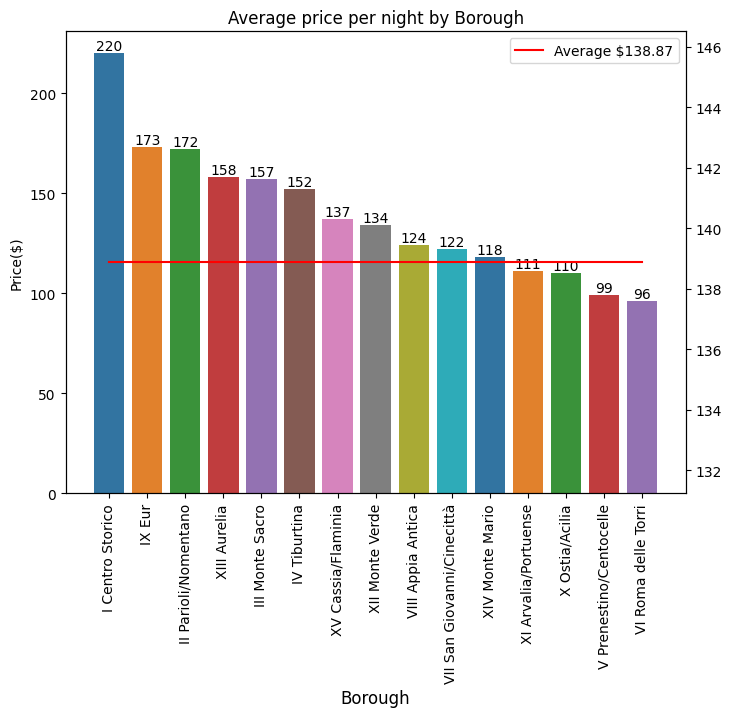

In [191]:
fig=plt.figure(figsize=(8,6))
ax1=sns.barplot(x="neighbourhood",y="price",hue="neighbourhood",palette="tab10",data=boroughs)
for bars in ax1.containers:
    ax1.bar_label(bars)
plt.xticks(rotation=90,size=10)
plt.xlabel("Borough",fontsize=12)
plt.ylabel("Price($)")
mean_borough=boroughs.price.mean().round(2)
ax2=ax1.twinx()
ax2=sns.lineplot(x="neighbourhood",y=mean_borough,data=boroughs,label="Average $138.87",color="r")
plt.title("Average price per night by Borough")
plt.show()

#### 3.5 List the top Hosts in Rome city based on Score

In [65]:
airbnb

,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews,price,price_category,price_per_month
0,2737,Elif,Private room,VIII Appia Antica,4.66,7,60.0,Low,1825.00
1,3079,Laura,Entire home/apt,I Centro Storico,4.62,21,90.0,Average,2737.50
2,103245,Carla,Entire home/apt,I Centro Storico,4.89,389,98.0,Average,2980.83
3,11834,Serena,Entire home/apt,I Centro Storico,4.89,203,107.0,Average,3254.58
4,103870,Fabrizio,Entire home/apt,I Centro Storico,4.41,289,81.0,Low,2463.75
...,...,...,...,...,...,...,...,...,...
28009,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,0.00,0,200.0,Expensive,6083.33
28010,973116672976730965,Andrea,Entire home/apt,I Centro Storico,0.00,0,400.0,Expensive,12166.67
28011,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,0.00,0,155.0,Average,4714.58
28012,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,0.00,0,80.0,Low,2433.33


In [66]:
filter=airbnb.score==5
airbnb.loc[filter]

,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews,price,price_category,price_per_month
108,75474,Marina,Entire home/apt,III Monte Sacro,5.0,2,2337.0,Extravagant,71083.75
314,305113,Fernando,Entire home/apt,I Centro Storico,5.0,14,250.0,Expensive,7604.17
386,498478,Gio,Private room,XII Monte Verde,5.0,7,70.0,Low,2129.17
669,839925,Luciana,Entire home/apt,VII San Giovanni/Cinecittà,5.0,2,31.0,Low,942.92
703,983127,Laura,Private room,XIII Aurelia,5.0,1,84.0,Average,2555.00
...,...,...,...,...,...,...,...,...,...
27798,968676260217798067,Ivan,Private room,I Centro Storico,5.0,1,89.0,Average,2707.08
27803,968817628094496224,Fabiano,Entire home/apt,III Monte Sacro,5.0,1,75.0,Low,2281.25
27817,967473916615767534,Luca,Entire home/apt,I Centro Storico,5.0,1,230.0,Expensive,6995.83
27914,971680788108654838,Maurizio & Fabio,Entire home/apt,I Centro Storico,5.0,1,320.0,Expensive,9733.33


Im going to categorize each host based on its score review

- Low Score: 0 - 2.4
- Standard: 2.5 - 4.0
- High Score: 4.1 - 5.0

In [67]:
label_names=["Low Score","Standard","High Score"]
score_ranges=[-np.inf,2.4,4.0,5]

airbnb["score rank"]=pd.cut(airbnb["score"],bins=score_ranges,labels=label_names)
airbnb

,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews,price,price_category,price_per_month,score rank
0,2737,Elif,Private room,VIII Appia Antica,4.66,7,60.0,Low,1825.00,High Score
1,3079,Laura,Entire home/apt,I Centro Storico,4.62,21,90.0,Average,2737.50,High Score
2,103245,Carla,Entire home/apt,I Centro Storico,4.89,389,98.0,Average,2980.83,High Score
3,11834,Serena,Entire home/apt,I Centro Storico,4.89,203,107.0,Average,3254.58,High Score
4,103870,Fabrizio,Entire home/apt,I Centro Storico,4.41,289,81.0,Low,2463.75,High Score
...,...,...,...,...,...,...,...,...,...,...
28009,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,0.00,0,200.0,Expensive,6083.33,Low Score
28010,973116672976730965,Andrea,Entire home/apt,I Centro Storico,0.00,0,400.0,Expensive,12166.67,Low Score
28011,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,0.00,0,155.0,Average,4714.58,Low Score
28012,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,0.00,0,80.0,Low,2433.33,Low Score


In [70]:
score_rank=airbnb.groupby(["score rank"],as_index=False)["listing_id"].count().rename(columns=({"listing_id":"total"}))
score_rank

,score rank,total
0,Low Score,4050
1,Standard,553
2,High Score,23384


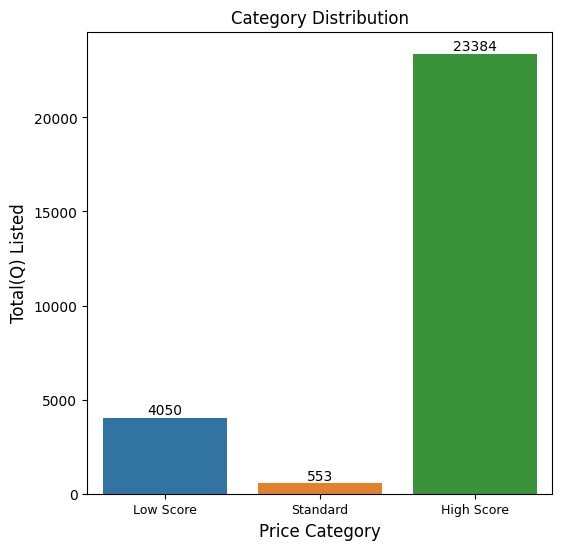

In [196]:
plt.figure(figsize=(6,6))
ax=sns.barplot(x="score rank",y="total",data=score_rank,hue="score rank",legend=False)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Category Distribution")
plt.xlabel("Price Category",fontsize=12)
plt.ylabel("Total(Q) Listed",fontsize=12)
plt.xticks(rotation=0,size=9)
plt.show()

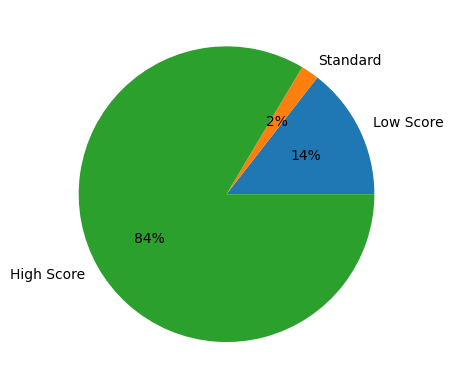

In [197]:
data=score_rank.total
labels_pie=score_rank["score rank"]

plt.pie(data,labels=labels_pie,colors=sns.color_palette("tab10"),autopct='%.0f%%')
plt.show()

For the total Airbnb's listed in Rome, 84% travelers gave them a High Score.

That means Romans hosts are doing great providing good accommodations meeting the demand requirements.

In [198]:
airbnb

,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews,price,price_category,price_per_month,score rank
0,2737,Elif,Private room,VIII Appia Antica,4.66,7,60.0,Low,1825.00,High Score
1,3079,Laura,Entire home/apt,I Centro Storico,4.62,21,90.0,Average,2737.50,High Score
2,103245,Carla,Entire home/apt,I Centro Storico,4.89,389,98.0,Average,2980.83,High Score
3,11834,Serena,Entire home/apt,I Centro Storico,4.89,203,107.0,Average,3254.58,High Score
4,103870,Fabrizio,Entire home/apt,I Centro Storico,4.41,289,81.0,Low,2463.75,High Score
...,...,...,...,...,...,...,...,...,...,...
28009,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,0.00,0,200.0,Expensive,6083.33,Low Score
28010,973116672976730965,Andrea,Entire home/apt,I Centro Storico,0.00,0,400.0,Expensive,12166.67,Low Score
28011,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,0.00,0,155.0,Average,4714.58,Low Score
28012,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,0.00,0,80.0,Low,2433.33,Low Score


In [199]:
#Top 10 hosts

top_hosts=airbnb.groupby(["listing_id","number_of_reviews","host_name"],as_index=False).score.max().sort_values(["score","number_of_reviews"],ascending=[False,False]).head(10)
top_hosts

,listing_id,number_of_reviews,host_name,score
7578,20160040,95,Alessandra E Rosy,5.0
16274,50499899,91,Ugo,5.0
11754,34214696,77,Erika,5.0
16691,51402307,58,Roberta,5.0
21527,747668375574358111,50,EasyDomus,5.0
16094,50145475,46,Davide,5.0
15290,46254461,37,Cory@,5.0
12237,35922525,35,Andrea,5.0
13874,41605978,35,Luigi,5.0
21451,745001232536691028,32,Maurizio,5.0


The above output gives us the top 10 Hosts based on its score and most importantly the number of reviews, 

the higher the number of reviews the more accurate is the final score received

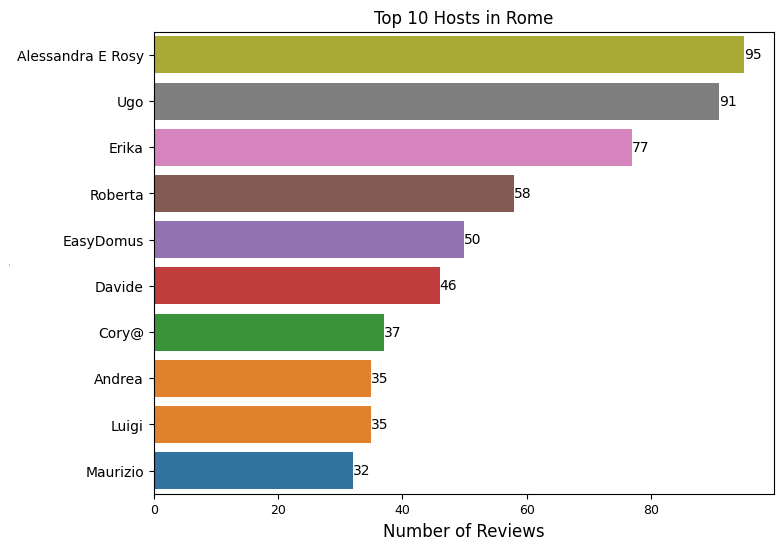

In [139]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x="number_of_reviews",y="host_name",data=top_hosts,palette="tab10",hue="number_of_reviews",legend=False)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Top 10 Hosts in Rome")
plt.xlabel("Number of Reviews",fontsize=12)
plt.ylabel("Host",fontsize=0)
plt.xticks(rotation=0,size=9)
plt.show()

#### 3.6 Extract the key topics from score reviews posted by travelers.

- To extract the key topics im going to extract the key topics in English and Italian

In [140]:
reviews

,listing_id,comments
26,3079,La signora Laura è stata molto cordiale e disp...
27,3079,Laura a été une excellente hôtesse. Je l'en re...
169,11834,Great location. Everything whiting walking di...
170,11834,The location was perfect for us and the studio...
171,11834,Amazing location and very adorable flat. Will ...
...,...,...
1518977,882472394957431598,We very much enjoyed staying at this apartment...
1518978,882472394957431598,Apartamento excelente!! Recepção muito boa e l...
1518980,882472394957431598,Excelente localização! Apartamento bem complet...
1518981,882472394957431598,Departamento muy lindo y muy bien ubicado dond...


In [141]:
total_reviews=reviews.shape[0]
f"There is a total of {total_reviews} reviews for the Airbnbs listings in Rome"

'There is a total of 328398 reviews for the Airbnbs listings in Rome'

In [142]:
# Checking for Null Values

reviews.isnull().sum()

listing_id    0
comments      0
dtype: int64

In [143]:
reviews

,listing_id,comments
26,3079,La signora Laura è stata molto cordiale e disp...
27,3079,Laura a été une excellente hôtesse. Je l'en re...
169,11834,Great location. Everything whiting walking di...
170,11834,The location was perfect for us and the studio...
171,11834,Amazing location and very adorable flat. Will ...
...,...,...
1518977,882472394957431598,We very much enjoyed staying at this apartment...
1518978,882472394957431598,Apartamento excelente!! Recepção muito boa e l...
1518980,882472394957431598,Excelente localização! Apartamento bem complet...
1518981,882472394957431598,Departamento muy lindo y muy bien ubicado dond...


In [491]:
from langdetect import detect, LangDetectException

In [492]:
# Detecting Language for each comment

def f(x):
    try:
        result = detect(x)
    except LangDetectException as e:
        result = str(e)
    return result


reviews["language"] = reviews["comments"].apply(f)

In [493]:
language_reviews=reviews.copy()

In [494]:
language_reviews

,listing_id,comments,language
26,3079,La signora Laura è stata molto cordiale e disp...,it
27,3079,Laura a été une excellente hôtesse. Je l'en re...,fr
169,11834,Great location. Everything whiting walking di...,en
170,11834,The location was perfect for us and the studio...,en
171,11834,Amazing location and very adorable flat. Will ...,en
...,...,...,...
1518977,882472394957431598,We very much enjoyed staying at this apartment...,en
1518978,882472394957431598,Apartamento excelente!! Recepção muito boa e l...,pt
1518980,882472394957431598,Excelente localização! Apartamento bem complet...,pt
1518981,882472394957431598,Departamento muy lindo y muy bien ubicado dond...,es


##### 3.6.1 English reviews

In [495]:
# Filtering by english language

filter=language_reviews.language=="en"
english_reviews=language_reviews.loc[filter]
english_reviews

,listing_id,comments,language
169,11834,Great location. Everything whiting walking di...,en
170,11834,The location was perfect for us and the studio...,en
171,11834,Amazing location and very adorable flat. Will ...,en
172,11834,A very nice place in a great location. The pla...,en
173,11834,Amazing little place. Very central and lots of...,en
...,...,...,...
1518972,882472394957431598,Good appointment and very clean,en
1518973,882472394957431598,We spent a wonderful holiday stay!! The apartm...,en
1518976,882472394957431598,The location is absolutely great! Very central...,en
1518977,882472394957431598,We very much enjoyed staying at this apartment...,en


In [496]:
# Importing libraries

import string
import nltk
import yake
import wordcloud

In [497]:
english_reviews

,listing_id,comments,language
169,11834,Great location. Everything whiting walking di...,en
170,11834,The location was perfect for us and the studio...,en
171,11834,Amazing location and very adorable flat. Will ...,en
172,11834,A very nice place in a great location. The pla...,en
173,11834,Amazing little place. Very central and lots of...,en
...,...,...,...
1518972,882472394957431598,Good appointment and very clean,en
1518973,882472394957431598,We spent a wonderful holiday stay!! The apartm...,en
1518976,882472394957431598,The location is absolutely great! Very central...,en
1518977,882472394957431598,We very much enjoyed staying at this apartment...,en


In [498]:
# Step 1: Casting comments lo lower

english_reviews["comments"]=english_reviews.comments.str.lower()
english_reviews

,listing_id,comments,language
169,11834,great location. everything whiting walking di...,en
170,11834,the location was perfect for us and the studio...,en
171,11834,amazing location and very adorable flat. will ...,en
172,11834,a very nice place in a great location. the pla...,en
173,11834,amazing little place. very central and lots of...,en
...,...,...,...
1518972,882472394957431598,good appointment and very clean,en
1518973,882472394957431598,we spent a wonderful holiday stay!! the apartm...,en
1518976,882472394957431598,the location is absolutely great! very central...,en
1518977,882472394957431598,we very much enjoyed staying at this apartment...,en


In [499]:
# Step 2: Removing punctuation and digits

exclist=string.punctuation+string.digits
exclist

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~0123456789'

In [500]:
# Applying the exclution list

for i in exclist:
    english_reviews["comments"]=english_reviews["comments"].str.replace(i,"")

In [501]:
english_reviews

,listing_id,comments,language
169,11834,great location everything whiting walking dis...,en
170,11834,the location was perfect for us and the studio...,en
171,11834,amazing location and very adorable flat will d...,en
172,11834,a very nice place in a great location the plac...,en
173,11834,amazing little place very central and lots of ...,en
...,...,...,...
1518972,882472394957431598,good appointment and very clean,en
1518973,882472394957431598,we spent a wonderful holiday stay the apartmen...,en
1518976,882472394957431598,the location is absolutely great very central ...,en
1518977,882472394957431598,we very much enjoyed staying at this apartment...,en


In [502]:
# Importing libraries

from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diazc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [503]:
# Step 3: Apply Stop Words in comments

stop_words=stopwords.words("english")
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [504]:
# Creating a personalized stopwords list that I know will disrupt the extraction of the Key Words

my_stopwords=["apartment","rome","place","stay"]
stop_words.extend(my_stopwords)

In [505]:
# Checking if addition of my_stopwords is succesfully

"rome" in stop_words

True

In [506]:
english_reviews['stopwords'] =english_reviews['comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [507]:
english_reviews

,listing_id,comments,language,stopwords
169,11834,great location everything whiting walking dis...,en,great location everything whiting walking dist...
170,11834,the location was perfect for us and the studio...,en,location perfect us studio cosy brnot mention ...
171,11834,amazing location and very adorable flat will d...,en,amazing location adorable flat definitely sere...
172,11834,a very nice place in a great location the plac...,en,nice great location detailed hosts make airbnb...
173,11834,amazing little place very central and lots of ...,en,amazing little central lots shops around quite...
...,...,...,...,...
1518972,882472394957431598,good appointment and very clean,en,good appointment clean
1518973,882472394957431598,we spent a wonderful holiday stay the apartmen...,en,spent wonderful holiday location great
1518976,882472394957431598,the location is absolutely great very central ...,en,location absolutely great central walking dist...
1518977,882472394957431598,we very much enjoyed staying at this apartment...,en,much enjoyed staying heart romes campo de fior...


In [508]:
# Step 4: Extract Keywords (three Key Words)

language = 'en'
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 3
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size,dedupLim=deduplication_threshold,top=numOfKeywords, features=None)
extract_keywords = lambda x: ",".join(k[0] for k in custom_kw_extractor.extract_keywords(x))
english_reviews['keywords'] = english_reviews['stopwords'].apply(extract_keywords)

In [509]:
# Importing libraries

import wordcloud
from wordcloud import WordCloud

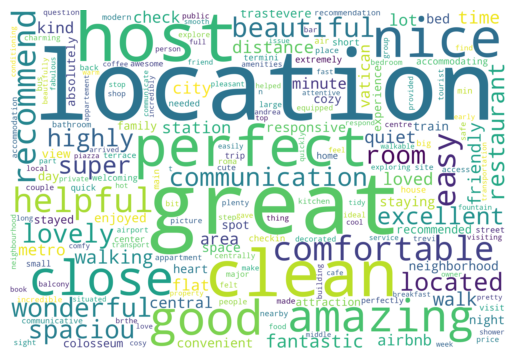

In [510]:
# Step 5: Create the Word Cloud

text=",".join(comment for comment in english_reviews.keywords)
my_wordcloud= WordCloud(collocations = False, background_color = 'white',width = 3048, height = 2080).generate(text)
plt.imshow(my_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Extracting the key words out of each english comment in each airbnb accommodations I can say:

1. Locations is perhaps the most relevant feature for travelers, could be explain perhaps as location close to metro or close to the city center.

2. There are many qualities to mention such as: Cleanliness, excellent, amazing fantastic etc. 

In general I can say that the hosties in Rome are doing a good job by satisfying the travelers needs.

##### 3.6.2 Italian

In [511]:
language_reviews

,listing_id,comments,language
26,3079,La signora Laura è stata molto cordiale e disp...,it
27,3079,Laura a été une excellente hôtesse. Je l'en re...,fr
169,11834,Great location. Everything whiting walking di...,en
170,11834,The location was perfect for us and the studio...,en
171,11834,Amazing location and very adorable flat. Will ...,en
...,...,...,...
1518977,882472394957431598,We very much enjoyed staying at this apartment...,en
1518978,882472394957431598,Apartamento excelente!! Recepção muito boa e l...,pt
1518980,882472394957431598,Excelente localização! Apartamento bem complet...,pt
1518981,882472394957431598,Departamento muy lindo y muy bien ubicado dond...,es


In [512]:
# Filtering Italian

filter=language_reviews.language=="it"
italian_reviews=language_reviews.loc[filter]
italian_reviews

,listing_id,comments,language
26,3079,La signora Laura è stata molto cordiale e disp...,it
1003,19965,"Host simpatica e gentile, appartamento situato...",it
1072,19965,ottima posizione! la casa dispone di ogni comf...,it
1164,19965,"Ottima posizione, appartamento un po' vecchio",it
1421,217411,Ci ritornerei. Mi sono trovata bene,it
...,...,...,...
1490104,784745724213542514,"Katia e Robi sono persone molto disponibili, c...",it
1490434,775209283381784665,Pulito e molto accogliente.<br/>L’arredamento ...,it
1518419,882418175206772113,L’Appartamento è meravigliosamente centrale. S...,it
1518442,882418175206772113,"Nell' alloggio di Valeria non manca nulla, l a...",it


In [513]:
# Step 1: Casting comments lo lower

italian_reviews["comments"]=italian_reviews.comments.str.lower()
italian_reviews

,listing_id,comments,language
26,3079,la signora laura è stata molto cordiale e disp...,it
1003,19965,"host simpatica e gentile, appartamento situato...",it
1072,19965,ottima posizione! la casa dispone di ogni comf...,it
1164,19965,"ottima posizione, appartamento un po' vecchio",it
1421,217411,ci ritornerei. mi sono trovata bene,it
...,...,...,...
1490104,784745724213542514,"katia e robi sono persone molto disponibili, c...",it
1490434,775209283381784665,pulito e molto accogliente.<br/>l’arredamento ...,it
1518419,882418175206772113,l’appartamento è meravigliosamente centrale. s...,it
1518442,882418175206772113,"nell' alloggio di valeria non manca nulla, l a...",it


In [514]:
# Step 2: Remove punctuation and digits

exclist

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~0123456789'

In [515]:
# Applying the exclution list

for i in exclist:
    italian_reviews["comments"]=italian_reviews["comments"].str.replace(i,"")

In [516]:
italian_reviews

,listing_id,comments,language
26,3079,la signora laura è stata molto cordiale e disp...,it
1003,19965,host simpatica e gentile appartamento situato ...,it
1072,19965,ottima posizione la casa dispone di ogni comfo...,it
1164,19965,ottima posizione appartamento un po vecchio,it
1421,217411,ci ritornerei mi sono trovata bene,it
...,...,...,...
1490104,784745724213542514,katia e robi sono persone molto disponibili co...,it
1490434,775209283381784665,pulito e molto accoglientebrl’arredamento è nu...,it
1518419,882418175206772113,l’appartamento è meravigliosamente centrale si...,it
1518442,882418175206772113,nell alloggio di valeria non manca nulla l app...,it


In [517]:
# Step 3: Apply Stop Words in comments

stop_words=stopwords.words("italian")
stop_words

['ad',
 'al',
 'allo',
 'ai',
 'agli',
 'all',
 'agl',
 'alla',
 'alle',
 'con',
 'col',
 'coi',
 'da',
 'dal',
 'dallo',
 'dai',
 'dagli',
 'dall',
 'dagl',
 'dalla',
 'dalle',
 'di',
 'del',
 'dello',
 'dei',
 'degli',
 'dell',
 'degl',
 'della',
 'delle',
 'in',
 'nel',
 'nello',
 'nei',
 'negli',
 'nell',
 'negl',
 'nella',
 'nelle',
 'su',
 'sul',
 'sullo',
 'sui',
 'sugli',
 'sull',
 'sugl',
 'sulla',
 'sulle',
 'per',
 'tra',
 'contro',
 'io',
 'tu',
 'lui',
 'lei',
 'noi',
 'voi',
 'loro',
 'mio',
 'mia',
 'miei',
 'mie',
 'tuo',
 'tua',
 'tuoi',
 'tue',
 'suo',
 'sua',
 'suoi',
 'sue',
 'nostro',
 'nostra',
 'nostri',
 'nostre',
 'vostro',
 'vostra',
 'vostri',
 'vostre',
 'mi',
 'ti',
 'ci',
 'vi',
 'lo',
 'la',
 'li',
 'le',
 'gli',
 'ne',
 'il',
 'un',
 'uno',
 'una',
 'ma',
 'ed',
 'se',
 'perché',
 'anche',
 'come',
 'dov',
 'dove',
 'che',
 'chi',
 'cui',
 'non',
 'più',
 'quale',
 'quanto',
 'quanti',
 'quanta',
 'quante',
 'quello',
 'quelli',
 'quella',
 'quelle',
 'q

In [518]:
# Creating a personalized stopwords list that I know will disrupt the extraction of the Key Words

my_stopwords=["appartamento","roma","lappartamento","stanza"]
stop_words.extend(my_stopwords)

In [519]:
# Checking if addition of my_stopwords is succesfully

"roma" in stop_words

True

In [520]:
italian_reviews['stopwords'] =italian_reviews['comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [521]:
italian_reviews

,listing_id,comments,language,stopwords
26,3079,la signora laura è stata molto cordiale e disp...,it,signora laura stata molto cordiale disponibile...
1003,19965,host simpatica e gentile appartamento situato ...,it,host simpatica gentile situato posizione davve...
1072,19965,ottima posizione la casa dispone di ogni comfo...,it,ottima posizione casa dispone ogni comfort con...
1164,19965,ottima posizione appartamento un po vecchio,it,ottima posizione po vecchio
1421,217411,ci ritornerei mi sono trovata bene,it,ritornerei trovata bene
...,...,...,...,...
1490104,784745724213542514,katia e robi sono persone molto disponibili co...,it,katia robi persone molto disponibili cordiali ...
1490434,775209283381784665,pulito e molto accoglientebrl’arredamento è nu...,it,pulito molto accoglientebrl’arredamento nuovo ...
1518419,882418175206772113,l’appartamento è meravigliosamente centrale si...,it,l’appartamento meravigliosamente centrale cent...
1518442,882418175206772113,nell alloggio di valeria non manca nulla l app...,it,alloggio valeria manca nulla perfetto due pers...


In [522]:
# Step 4: Extract Keywords (three Key Words)

language = 'it'
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 3
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size,dedupLim=deduplication_threshold,top=numOfKeywords, features=None)
extract_keywords = lambda x: ",".join(k[0] for k in custom_kw_extractor.extract_keywords(x))
italian_reviews['keywords'] = italian_reviews['stopwords'].apply(extract_keywords)

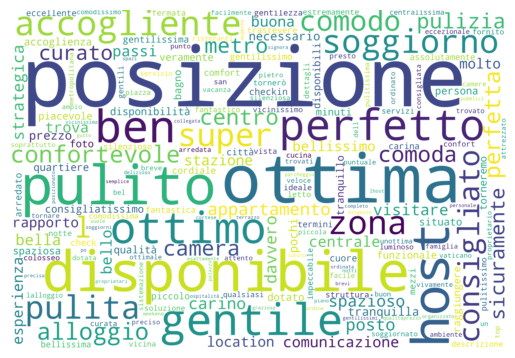

In [523]:
# Step 5: Create the Word Cloud

text=",".join(comment for comment in italian_reviews.keywords)
my_wordcloud= WordCloud(collocations = False, background_color = 'white',width = 3048, height = 2080).generate(text)
plt.imshow(my_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Extracting the key words out of each Italian comments in each airbnb accommodations I can say:

1. Locations is perhaps the most relevant feature for travelers. could be explain perhaps as location close to metro or close to the city center.

2. There are many qualities to mention such as: Cleanliness, excellent, amazing fantastic etc.

3. It seems that italians pay close attention to the host attention towards them because of key words: Accogliente,gentile.

In general I can say that the hosties in Rome are doing a good job by satisfying the Italian travelers needs.

#### 3.7 Extract the key topics from the low scores reviews posted by travelers.

In [627]:
airbnb

,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews,price,price_category,price_per_month,score rank
0,2737,Elif,Private room,VIII Appia Antica,4.66,7,60.0,Low,1825.00,High Score
1,3079,Laura,Entire home/apt,I Centro Storico,4.62,21,90.0,Average,2737.50,High Score
2,103245,Carla,Entire home/apt,I Centro Storico,4.89,389,98.0,Average,2980.83,High Score
3,11834,Serena,Entire home/apt,I Centro Storico,4.89,203,107.0,Average,3254.58,High Score
4,103870,Fabrizio,Entire home/apt,I Centro Storico,4.41,289,81.0,Low,2463.75,High Score
...,...,...,...,...,...,...,...,...,...,...
28009,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,0.00,0,200.0,Expensive,6083.33,Low Score
28010,973116672976730965,Andrea,Entire home/apt,I Centro Storico,0.00,0,400.0,Expensive,12166.67,Low Score
28011,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,0.00,0,155.0,Average,4714.58,Low Score
28012,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,0.00,0,80.0,Low,2433.33,Low Score


In [628]:
# Filtering by Standard

filter=airbnb["score rank"]=="Low Score"
low_airbnb=airbnb.loc[filter]
low_airbnb

,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews,price,price_category,price_per_month,score rank
90,171442,Daria,Entire home/apt,XV Cassia/Flaminia,0.0,0,80.0,Low,2433.33,Low Score
133,84953,Luca,Entire home/apt,XIII Aurelia,0.0,0,50.0,Low,1520.83,Low Score
140,232470,Franco,Private room,VIII Appia Antica,0.0,0,69.0,Low,2098.75,Low Score
191,265074,Christian,Entire home/apt,XV Cassia/Flaminia,0.0,0,150.0,Average,4562.50,Low Score
198,340173,Pier,Entire home/apt,IV Tiburtina,0.0,0,95.0,Average,2889.58,Low Score
...,...,...,...,...,...,...,...,...,...,...
28009,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,0.0,0,200.0,Expensive,6083.33,Low Score
28010,973116672976730965,Andrea,Entire home/apt,I Centro Storico,0.0,0,400.0,Expensive,12166.67,Low Score
28011,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,0.0,0,155.0,Average,4714.58,Low Score
28012,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,0.0,0,80.0,Low,2433.33,Low Score


In [629]:
# Merging tables

low_airbnb=pd.merge(left=low_airbnb,right=language_reviews,on="listing_id",how="left")
low_airbnb


,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews,price,price_category,price_per_month,score rank,comments,language
0,171442,Daria,Entire home/apt,XV Cassia/Flaminia,0.0,0,80.0,Low,2433.33,Low Score,NaN,NaN
1,84953,Luca,Entire home/apt,XIII Aurelia,0.0,0,50.0,Low,1520.83,Low Score,NaN,NaN
2,232470,Franco,Private room,VIII Appia Antica,0.0,0,69.0,Low,2098.75,Low Score,NaN,NaN
3,265074,Christian,Entire home/apt,XV Cassia/Flaminia,0.0,0,150.0,Average,4562.50,Low Score,NaN,NaN
4,340173,Pier,Entire home/apt,IV Tiburtina,0.0,0,95.0,Average,2889.58,Low Score,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4046,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,0.0,0,200.0,Expensive,6083.33,Low Score,NaN,NaN
4047,973116672976730965,Andrea,Entire home/apt,I Centro Storico,0.0,0,400.0,Expensive,12166.67,Low Score,NaN,NaN
4048,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,0.0,0,155.0,Average,4714.58,Low Score,NaN,NaN
4049,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,0.0,0,80.0,Low,2433.33,Low Score,NaN,NaN


In [630]:
# Filtering Columns for Review analysis

filtercolumns=["listing_id","host_name","room_type","score","score rank","comments","language"]
low_airbnb=low_airbnb.loc[:,filtercolumns]
low_airbnb

,listing_id,host_name,room_type,score,score rank,comments,language
0,171442,Daria,Entire home/apt,0.0,Low Score,NaN,NaN
1,84953,Luca,Entire home/apt,0.0,Low Score,NaN,NaN
2,232470,Franco,Private room,0.0,Low Score,NaN,NaN
3,265074,Christian,Entire home/apt,0.0,Low Score,NaN,NaN
4,340173,Pier,Entire home/apt,0.0,Low Score,NaN,NaN
...,...,...,...,...,...,...,...
4046,973114587147200878,Luciana,Entire home/apt,0.0,Low Score,NaN,NaN
4047,973116672976730965,Andrea,Entire home/apt,0.0,Low Score,NaN,NaN
4048,973122317695245605,Ernesto,Entire home/apt,0.0,Low Score,NaN,NaN
4049,973124076276156534,Simone,Entire home/apt,0.0,Low Score,NaN,NaN


##### English

In [632]:
# Filtering English Language

filter=low_airbnb.language=="en"
low_english=low_airbnb.loc[filter]
low_english

,listing_id,host_name,room_type,score,score rank,comments,language
323,11060417,Roma Castle,Private room,1.00,Low Score,After you book a room the host will tell that...,en
505,19442487,Federico,Entire home/apt,2.32,Low Score,Rome is very expensive so this represents val...,en
839,32017216,Letizia,Entire home/apt,0.00,Low Score,This stay was honestly so incredible! The suit...,en
901,33773219,Max,Hotel room,1.57,Low Score,DO NOT BOOK. This listing is FAKE. i was left ...,en
902,33773219,Max,Hotel room,1.57,Low Score,"THIS IS A HOTEL CALLED ALTAVILLA (not fake, vi...",en
930,35025002,Giulia,Entire home/apt,1.00,Low Score,This list is a FAKE,en
1071,39385663,Leonardo,Entire home/apt,0.00,Low Score,The place was spectacular. The location was pe...,en
1338,43338768,Ilenia,Private room,1.00,Low Score,you can expect two really rude hosts that will...,en
1893,633136517210907751,Focke,Entire home/apt,1.00,Low Score,The apartment did not exist when we try to fin...,en
1978,679542630298100370,Nicole Valentina,Private room,1.71,Low Score,I would not book this location until these peo...,en


In [633]:
# Step 1: Casting comments lo lower

low_english["comments"]=low_english.comments.str.lower()
low_english

,listing_id,host_name,room_type,score,score rank,comments,language
323,11060417,Roma Castle,Private room,1.00,Low Score,after you book a room the host will tell that...,en
505,19442487,Federico,Entire home/apt,2.32,Low Score,rome is very expensive so this represents val...,en
839,32017216,Letizia,Entire home/apt,0.00,Low Score,this stay was honestly so incredible! the suit...,en
901,33773219,Max,Hotel room,1.57,Low Score,do not book. this listing is fake. i was left ...,en
902,33773219,Max,Hotel room,1.57,Low Score,"this is a hotel called altavilla (not fake, vi...",en
930,35025002,Giulia,Entire home/apt,1.00,Low Score,this list is a fake,en
1071,39385663,Leonardo,Entire home/apt,0.00,Low Score,the place was spectacular. the location was pe...,en
1338,43338768,Ilenia,Private room,1.00,Low Score,you can expect two really rude hosts that will...,en
1893,633136517210907751,Focke,Entire home/apt,1.00,Low Score,the apartment did not exist when we try to fin...,en
1978,679542630298100370,Nicole Valentina,Private room,1.71,Low Score,i would not book this location until these peo...,en


In [634]:
# Step 2: Remove punctuation and digits

exclist

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~0123456789'

In [635]:
# Applying the exclution list

for i in exclist:
  low_english["comments"]=low_english["comments"].str.replace(i,"")

In [636]:
low_english

,listing_id,host_name,room_type,score,score rank,comments,language
323,11060417,Roma Castle,Private room,1.00,Low Score,after you book a room the host will tell that...,en
505,19442487,Federico,Entire home/apt,2.32,Low Score,rome is very expensive so this represents val...,en
839,32017216,Letizia,Entire home/apt,0.00,Low Score,this stay was honestly so incredible the suite...,en
901,33773219,Max,Hotel room,1.57,Low Score,do not book this listing is fake i was left st...,en
902,33773219,Max,Hotel room,1.57,Low Score,this is a hotel called altavilla not fake via ...,en
930,35025002,Giulia,Entire home/apt,1.00,Low Score,this list is a fake,en
1071,39385663,Leonardo,Entire home/apt,0.00,Low Score,the place was spectacular the location was per...,en
1338,43338768,Ilenia,Private room,1.00,Low Score,you can expect two really rude hosts that will...,en
1893,633136517210907751,Focke,Entire home/apt,1.00,Low Score,the apartment did not exist when we try to fin...,en
1978,679542630298100370,Nicole Valentina,Private room,1.71,Low Score,i would not book this location until these peo...,en


In [637]:
# Removing score with zero

filter=low_english.score!=0
low_english=low_english.loc[filter]
low_english

,listing_id,host_name,room_type,score,score rank,comments,language
323,11060417,Roma Castle,Private room,1.00,Low Score,after you book a room the host will tell that...,en
505,19442487,Federico,Entire home/apt,2.32,Low Score,rome is very expensive so this represents val...,en
901,33773219,Max,Hotel room,1.57,Low Score,do not book this listing is fake i was left st...,en
902,33773219,Max,Hotel room,1.57,Low Score,this is a hotel called altavilla not fake via ...,en
930,35025002,Giulia,Entire home/apt,1.00,Low Score,this list is a fake,en
1338,43338768,Ilenia,Private room,1.00,Low Score,you can expect two really rude hosts that will...,en
1893,633136517210907751,Focke,Entire home/apt,1.00,Low Score,the apartment did not exist when we try to fin...,en
1978,679542630298100370,Nicole Valentina,Private room,1.71,Low Score,i would not book this location until these peo...,en


In [638]:
# Step 3: Apply Stop Words in comments

stop_words=stopwords.words("english")

In [639]:
low_english['stopwords'] =low_english['comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [640]:
# Step 4: Extract Keywords (three Key Words)

language = 'en'
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 3
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size,dedupLim=deduplication_threshold,top=numOfKeywords, features=None)
extract_keywords = lambda x: ",".join(k[0] for k in custom_kw_extractor.extract_keywords(x))
low_english['keywords'] = low_english['stopwords'].apply(extract_keywords)

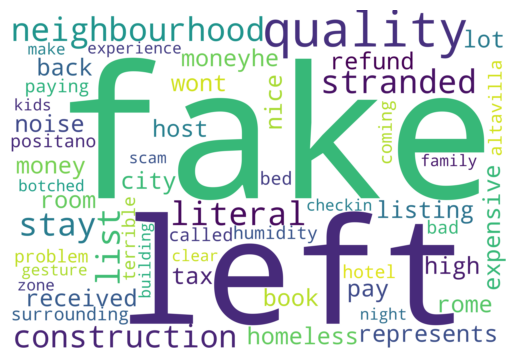

In [641]:
# Step 5: Create the Word Cloud

text=",".join(comment for comment in low_english.keywords)
my_wordcloud= WordCloud(collocations = False, background_color = 'white',width = 3048, height = 2080).generate(text)
plt.imshow(my_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Since 18 reviews for low scores wont drive conclutions, there is a big issue to attend for travelers whichs is perhaps for fake listings and perhaps low quality


##### Italian

In [642]:
low_airbnb

,listing_id,host_name,room_type,score,score rank,comments,language
0,171442,Daria,Entire home/apt,0.0,Low Score,NaN,NaN
1,84953,Luca,Entire home/apt,0.0,Low Score,NaN,NaN
2,232470,Franco,Private room,0.0,Low Score,NaN,NaN
3,265074,Christian,Entire home/apt,0.0,Low Score,NaN,NaN
4,340173,Pier,Entire home/apt,0.0,Low Score,NaN,NaN
...,...,...,...,...,...,...,...
4046,973114587147200878,Luciana,Entire home/apt,0.0,Low Score,NaN,NaN
4047,973116672976730965,Andrea,Entire home/apt,0.0,Low Score,NaN,NaN
4048,973122317695245605,Ernesto,Entire home/apt,0.0,Low Score,NaN,NaN
4049,973124076276156534,Simone,Entire home/apt,0.0,Low Score,NaN,NaN


In [644]:
# Filtering Italian

filter=low_airbnb.language=="it"
low_airbnb.loc[filter]

,listing_id,host_name,room_type,score,score rank,comments,language
481,18357582,Andrea,Private room,1.71,Low Score,La posizione è bella!<br/>Purtroppo avevamo la...,it
758,28219215,New,Hotel room,1.86,Low Score,Poca attenzione sul livello di pulizia camera...,it


2 Reviews is not enough to drive conclutions

#### 3.8 Whats the minimum nights policy required for travellers to stay?

In [144]:
df_calendar

,listing_id,minimum_nights,price
54,103245,2.0,90.0
55,103245,2.0,90.0
56,103245,2.0,90.0
57,103245,2.0,90.0
58,103245,2.0,90.0
...,...,...,...
10224821,970368661508986205,1.0,70.0
10224822,970368661508986205,1.0,70.0
10224823,970368661508986205,1.0,70.0
10224824,970368661508986205,1.0,70.0


In [145]:
minimum_nights_avg=df_calendar.groupby(["listing_id"],as_index=False).minimum_nights.mean().round()
minimum_nights_avg

,listing_id,minimum_nights
0,2737,7.0
1,3079,20.0
2,11834,2.0
3,12398,1.0
4,19965,3.0
...,...,...
28008,974444069985636620,1.0
28009,974518488270766355,1.0
28010,974522462685404156,1.0
28011,975043653007402983,3.0


The output shows the average minimum nights required by Listing id

In [146]:
# Filtering those less than 365 for coherence

filter=minimum_nights_avg.minimum_nights<=365
minimum_nights_avg=minimum_nights_avg.loc[filter]
minimum_nights_avg

,listing_id,minimum_nights
0,2737,7.0
1,3079,20.0
2,11834,2.0
3,12398,1.0
4,19965,3.0
...,...,...
28008,974444069985636620,1.0
28009,974518488270766355,1.0
28010,974522462685404156,1.0
28011,975043653007402983,3.0


In [147]:
minimum_nights_avg["minimum_nights"]=minimum_nights_avg["minimum_nights"].astype(int)
minimum_nights_avg

,listing_id,minimum_nights
0,2737,7
1,3079,20
2,11834,2
3,12398,1
4,19965,3
...,...,...
28008,974444069985636620,1
28009,974518488270766355,1
28010,974522462685404156,1
28011,975043653007402983,3


In [148]:
minimum_nights_avg["total"]=minimum_nights_avg["minimum_nights"]
minimum_nights_avg

,listing_id,minimum_nights,total
0,2737,7,7
1,3079,20,20
2,11834,2,2
3,12398,1,1
4,19965,3,3
...,...,...,...
28008,974444069985636620,1,1
28009,974518488270766355,1,1
28010,974522462685404156,1,1
28011,975043653007402983,3,3


In [149]:
minimum_nights=minimum_nights_avg.groupby(["minimum_nights"],as_index=False).total.count()
minimum_nights

,minimum_nights,total
0,1,8976
1,2,9839
2,3,6286
3,4,1027
4,5,572
...,...,...
57,268,1
58,300,1
59,360,3
60,364,3


In [150]:
# Casting minimum nights column to string to allow me to create a barplot

minimum_nights["minimum_nights"]=minimum_nights["minimum_nights"].astype(str)
minimum_nights

,minimum_nights,total
0,1,8976
1,2,9839
2,3,6286
3,4,1027
4,5,572
...,...,...
57,268,1
58,300,1
59,360,3
60,364,3


In [151]:
minimum_nights=minimum_nights.sort_values("total",ascending=False)
minimum_nights

,minimum_nights,total
1,2,9839
0,1,8976
2,3,6286
3,4,1027
4,5,572
...,...,...
43,80,1
42,78,1
35,55,1
40,69,1


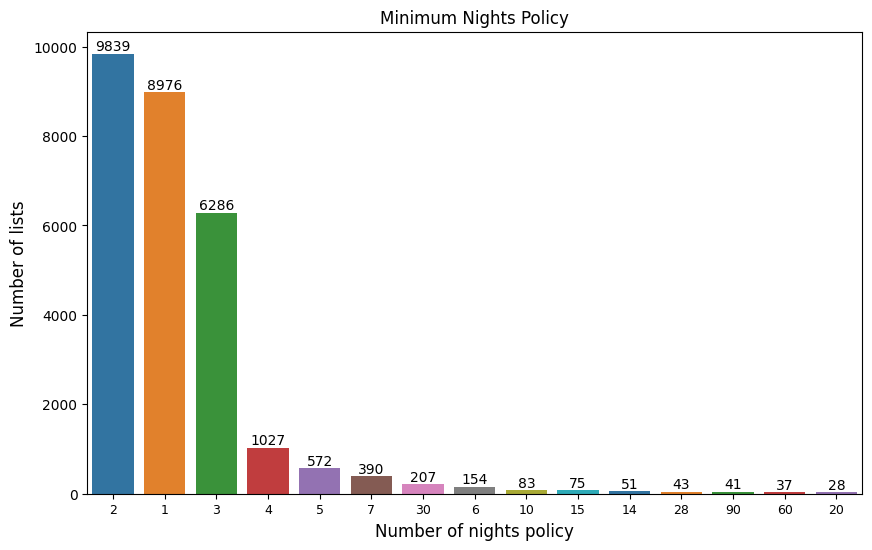

In [154]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="minimum_nights",y="total",data=minimum_nights[:15],hue="minimum_nights",legend=False,palette="tab10")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Minimum Nights Policy")
plt.xlabel("Number of nights policy",fontsize=12)
plt.ylabel("Number of lists",fontsize=12)
plt.xticks(rotation=0,size=9)
plt.show()

By looking at the "minimum nights" policies, the vast majority of listings requires that travellers stay at least one or two nights minimum

### Exporting tables

I had some issues exporting the table since there are some Host names that contains "\n" which Pythong recognize it as space

In [200]:
filter=airbnb.host_name.str.contains("\n")
airbnb.loc[filter]

,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews,price,price_category,price_per_month,score rank
3173,6463165,Alfonso&Edoardo \nSlow Life B&B,Private room,I Centro Storico,4.43,4,129.0,Average,3923.75,High Score
3174,6463407,Alfonso&Edoardo \nSlow Life B&B,Private room,I Centro Storico,4.81,3,144.0,Average,4380.00,High Score
3674,8064627,Alfonso&Edoardo \nSlow Life B&B,Private room,I Centro Storico,5.00,2,53.0,Low,1612.08,High Score
3806,8333068,Alfonso&Edoardo \nSlow Life B&B,Private room,I Centro Storico,4.58,21,84.0,Average,2555.00,High Score
4736,11323377,Alfonso&Edoardo \nSlow Life B&B,Private room,I Centro Storico,4.83,94,52.0,Low,1581.67,High Score


In [201]:
#Dropping "\n" out

airbnb["host_name"]=airbnb.host_name.str.replace("\n","")

In [202]:
# Checking if succesful

filter=airbnb.host_name.str.contains("\n")
airbnb.loc[filter]

,listing_id,host_name,room_type,neighbourhood,score,number_of_reviews,price,price_category,price_per_month,score rank


In [203]:
airbnb.columns=airbnb.columns.str.replace("_"," ")
airbnb

,listing id,host name,room type,neighbourhood,score,number of reviews,price,price category,price per month,score rank
0,2737,Elif,Private room,VIII Appia Antica,4.66,7,60.0,Low,1825.00,High Score
1,3079,Laura,Entire home/apt,I Centro Storico,4.62,21,90.0,Average,2737.50,High Score
2,103245,Carla,Entire home/apt,I Centro Storico,4.89,389,98.0,Average,2980.83,High Score
3,11834,Serena,Entire home/apt,I Centro Storico,4.89,203,107.0,Average,3254.58,High Score
4,103870,Fabrizio,Entire home/apt,I Centro Storico,4.41,289,81.0,Low,2463.75,High Score
...,...,...,...,...,...,...,...,...,...,...
28009,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,0.00,0,200.0,Expensive,6083.33,Low Score
28010,973116672976730965,Andrea,Entire home/apt,I Centro Storico,0.00,0,400.0,Expensive,12166.67,Low Score
28011,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,0.00,0,155.0,Average,4714.58,Low Score
28012,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,0.00,0,80.0,Low,2433.33,Low Score


In [204]:
airbnb.rename(columns=str.title,inplace=True)
airbnb

,Listing Id,Host Name,Room Type,Neighbourhood,Score,Number Of Reviews,Price,Price Category,Price Per Month,Score Rank
0,2737,Elif,Private room,VIII Appia Antica,4.66,7,60.0,Low,1825.00,High Score
1,3079,Laura,Entire home/apt,I Centro Storico,4.62,21,90.0,Average,2737.50,High Score
2,103245,Carla,Entire home/apt,I Centro Storico,4.89,389,98.0,Average,2980.83,High Score
3,11834,Serena,Entire home/apt,I Centro Storico,4.89,203,107.0,Average,3254.58,High Score
4,103870,Fabrizio,Entire home/apt,I Centro Storico,4.41,289,81.0,Low,2463.75,High Score
...,...,...,...,...,...,...,...,...,...,...
28009,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,0.00,0,200.0,Expensive,6083.33,Low Score
28010,973116672976730965,Andrea,Entire home/apt,I Centro Storico,0.00,0,400.0,Expensive,12166.67,Low Score
28011,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,0.00,0,155.0,Average,4714.58,Low Score
28012,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,0.00,0,80.0,Low,2433.33,Low Score


In [205]:
airbnb=airbnb.reset_index(drop=True)
airbnb

,Listing Id,Host Name,Room Type,Neighbourhood,Score,Number Of Reviews,Price,Price Category,Price Per Month,Score Rank
0,2737,Elif,Private room,VIII Appia Antica,4.66,7,60.0,Low,1825.00,High Score
1,3079,Laura,Entire home/apt,I Centro Storico,4.62,21,90.0,Average,2737.50,High Score
2,103245,Carla,Entire home/apt,I Centro Storico,4.89,389,98.0,Average,2980.83,High Score
3,11834,Serena,Entire home/apt,I Centro Storico,4.89,203,107.0,Average,3254.58,High Score
4,103870,Fabrizio,Entire home/apt,I Centro Storico,4.41,289,81.0,Low,2463.75,High Score
...,...,...,...,...,...,...,...,...,...,...
27982,973114587147200878,Luciana,Entire home/apt,X Ostia/Acilia,0.00,0,200.0,Expensive,6083.33,Low Score
27983,973116672976730965,Andrea,Entire home/apt,I Centro Storico,0.00,0,400.0,Expensive,12166.67,Low Score
27984,973122317695245605,Ernesto,Entire home/apt,XIII Aurelia,0.00,0,155.0,Average,4714.58,Low Score
27985,973124076276156534,Simone,Entire home/apt,II Parioli/Nomentano,0.00,0,80.0,Low,2433.33,Low Score


In [206]:
#airbnb.to_csv("airbnb_rome.csv",index=False)

In [648]:
#language_reviews.to_csv("reviews_by_language.csv",index=False)

In [649]:
#top_hosts.to_csv("Top_Rome_Hosts.csv",index=False)

In [153]:
#minimum_nights.to_csv("minimum_nights.csv",index=False)

### 4. Conclutions!

1. Rome offers 28.014 accomodations for travelers.

2. The average rate per night to stay in Rome is $181 Euros.

3. When casting the night rate per month the average cost is 5.505 which compared for one bedroom apartment in Rome is 1.650 [Link](https://housinganywhere.com/Rome--Italy/cost-of-living-rome)

- Here is important to note or stress that the growing popularity could be a threat for local rental market, as owners will get a higher profits on Airbnb platform. This could bring consequences for locals as they could be displaced out of their neighbourhoods. No wonder why cities like New York have implemented thought rules and other cities such as Dallas, Quebec, Memphis and San Francisco taking action to regulate short-term rentals. [The end of Airbnb in New York](https://www.wired.com/story/airbnb-ban-new-york-city/)

4. From the total 28.014 Airbnb listings in Rome, 70% from the category "Entire home/apt" dominates the market share.

5. The priciest neighbourhoods for a single night are: "Centro Storico, Eur and Parioli" out the whole fifteen Rome neighbourhoods.

6. Romans are doing great by satisfying the needs for travelers giving a high score to 84% accommodations. 

7. In 2022 there were 328.398 comments and reviews. After applying language detection using Python for both Italian and English, I can point out that location and cleanliness are top requirements for travelers.

8. Airbnb host owners require travelers to stay a minimum of one or two nights as a policy, with 8.976 and 9.389 listings, respectively.



### 5. Visualizations!

Airbnb Rome 2022-Google Looker: [link](https://lookerstudio.google.com/reporting/702b7f10-daa7-4ddc-8037-72764a6f22d4)

* Note: Anomalities are excluded